In [151]:
# from google.colab import drive
# drive.mount('/content/drive')

# import pandas as pd

# df = pd.read_csv('drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [152]:
import pandas as pd

random_state = 420

df = pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [153]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [154]:
df.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [155]:
df.isna().sum() # Checking for any missing values

review       0
sentiment    0
dtype: int64

There are some duplicate reviews (would be better to be removed in order to avoid bias)

In [156]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

review sentiment
3537   Quite what the producers of this appalling ada...  negative
3769   My favourite police series of all time turns t...  positive
4391   Beautiful film, pure Cassavetes style. Gena Ro...  positive
6352   If you liked the Grinch movie... go watch that...  negative
6479   I want very much to believe that the above quo...  negative
...                                                  ...       ...
49912  This is an incredible piece of drama and power...  positive
49950  This was a very brief episode that appeared in...  negative
49984  Hello it is I Derrick Cannon and I welcome you...  negative
49986  This movie is a disgrace to the Major League F...  negative
49991  Les Visiteurs, the first movie about the medie...  negative

[418 rows x 2 columns]

The duplicated data-points (based on all columns) are getting removed

Therefore, the final dataset consists of 49582 items

In [157]:
df = df.drop_duplicates()
df.describe()

review sentiment
count                                               49582     49582
unique                                              49582         2
top     One of the other reviewers has mentioned that ...  positive
freq                                                    1     24884

No missing values

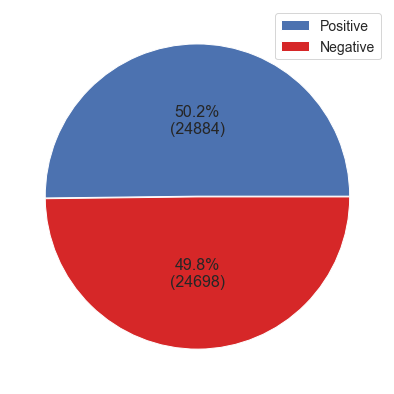

/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sentiment', ylabel='count'>

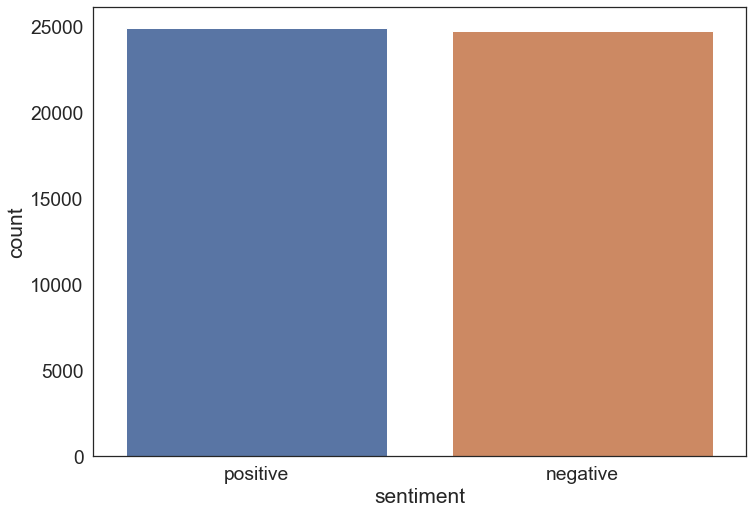

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']
# Create pie chart
pie, ax = plt.subplots(figsize=[11,7])
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2, pctdistance=0.5, colors=[sns.color_palette()[0],'tab:red'],textprops={'fontsize': 16})
# plt.title('Frequencies of sentiment labels', fontsize=14, fontweight='bold')
labels = [r'Positive', r'Negative']
plt.legend(labels, loc="best", prop={'size': 14})
pie.savefig("PieChart.png")
plt.show()




sns.countplot(df.sentiment)

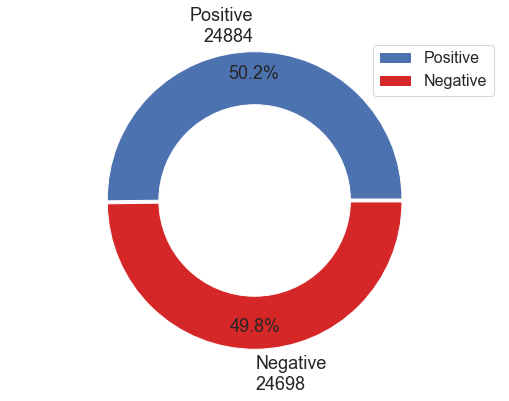

In [159]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['Positive\n24884\n', '\nNegative\n24698']
sizes = [50.2, 49.8]
#colors
colors = [sns.color_palette()[0],'tab:red']
#explsion
explode = (0.01,0.01)

pie, ax = plt.subplots(figsize=[7.5,6])
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', pctdistance=0.85, explode = explode, textprops={'fontsize': 18})
#draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.legend(['Positive', 'Negative'], loc="best", prop={'size': 16})
plt.tight_layout()
plt.show()

balanced dataset

Let's get an idea of how a review looks like

In [160]:
for review in df['review'][3:5]:
    print(review)
    print()

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.

Petter Mattei's "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different sit

## data cleaning

Regarding Stop-Words:

Tomas Mikolov is one of the developers of word2vec, a popular word embedding method. He suggests only very minimal text cleaning is required when learning a word embedding model.

Below is his response when pressed with the question about how to best prepare text data for word2vec.

There is no universal answer. It all depends on what you plan to use the vectors for. In my experience, it is usually good to disconnect (or remove) punctuation from words, and sometimes also convert all characters to lowercase. One can also replace all numbers (possibly greater than some constant) with some single token such as .

All these pre-processing steps aim to reduce the vocabulary size without removing any important content (which in some cases may not be true when you lowercase certain words, ie. ‘Bush’ is different than ‘bush’, while ‘Another’ has usually the same sense as ‘another’). The smaller the vocabulary is, the lower is the memory complexity, and the more robustly are the parameters for the words estimated. You also have to pre-process the test data in the same way.

…

In short, you will understand all this much better if you will run experiments.

In [161]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

stop = set(stopwords.words('english'))
# punctuation = list(punctuation)  # happens inside other cell
# stop.update(punctuation)

# Extra stop-words from domain words (founded by tf-idf)
# domain_stop = ['movie','film', 'one']
# stop.update(domain_stop)

# We need to keep the 'not' since this is a sentiment analysis task
# stop.remove('not')

[nltk_data] Downloading package stopwords to /home/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [162]:
print(stop)

{'for', 'doesn', 'been', 'against', 'will', 'which', 'haven', 'more', 'don', 'over', 'having', 'where', 'up', 'who', 'have', 'above', 'were', "hadn't", 'in', 'not', 'own', 'at', 'shan', 'during', 'on', 'weren', 'couldn', 'hers', "couldn't", "hasn't", 'those', 'yours', 'mightn', 'shouldn', 'she', 'm', "should've", 'ourselves', 'being', 'while', 'we', 'no', 'any', 't', 'hadn', 'a', "you'll", 'until', 'about', "didn't", 'with', "isn't", 'if', 'then', 'it', 'through', "she's", 's', "aren't", 'whom', 'both', "that'll", 'had', 'should', 'does', 'there', 'all', 're', "it's", 'only', 'be', 'didn', 'd', 'your', 'nor', 'o', 'was', 'out', 'an', "haven't", 'under', 'isn', 'before', 'themselves', 'further', "mustn't", "weren't", 'won', 'has', 'of', 'the', "wouldn't", 'himself', 'did', 'just', 'or', 'how', 'ours', 'such', "you're", 'them', "don't", 'their', 'he', 'you', 'same', 'that', 'to', 'herself', 'again', 'needn', 'from', 'why', 'other', 'into', 'itself', 'than', "won't", 'as', 'between', 'i',

WARNING!!: Maybe the stop words should not be removed!!! For some models

In [140]:
# from bs4 import BeautifulSoup
# import re,string,unicodedata
# import contractions


# def strip_html(text):
#     soup = BeautifulSoup(text, "html.parser")
#     return soup.get_text()

# #Removing the square brackets
# # def remove_between_square_brackets(text):
# #     return re.sub('\[[^]]*\]', '', text)


# # Expanding contractions
# def expand_contractions(text):
#     return contractions.fix(text)
    
# # Removing URL's
# def remove_between_square_brackets(text):
#     return re.sub(r'http\S+', '', text)

# def make_lowercase(text):
#     lower_text = text.lower()
#     return lower_text

# # Removing the stopwords from text
# def remove_stopwords(text):
#     final_text = []
#     for i in text.split():
#         if i.strip().lower() not in stop and i.strip().lower().isalpha():
#             final_text.append(i.strip().lower())
#     return " ".join(final_text)

# # Define function for removing special characters (keeps numbers etc)
# def remove_special_characters(text):
#     pattern = r'[^a-zA-z0-9\s]'
#     text = re.sub(pattern,'',text)
#     return text

# # Stemming the text
# def simple_stemmer(text):
#     stemmer = nltk.porter.PorterStemmer()
#     text =  ' '.join([stemmer.stem(word) for word in text.split()])
#     return text

# # Denoising the corpus text
# def preprocess_text(text):
#     text = strip_html(text)
#     text = remove_between_square_brackets(text)
#     text = make_lowercase(text)
#     text = expand_contractions(text)
#     text = remove_special_characters(text)
#     text = remove_stopwords(text)
#     text = simple_stemmer(text)

#     return text

# # Apply function on review column
# df['review'] = df['review'].apply(preprocess_text)

In [163]:
from bs4 import BeautifulSoup
import re,string,unicodedata
import contractions
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

import contractions
# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):
    
    wl = WordNetLemmatizer()
    
    soup = BeautifulSoup(text, "html.parser") # Removing html tags
    text = soup.get_text()
    text = expand_contractions(text) # Expanding chatwords and contracts clearing contractions
    emoji_clean = re.compile("[" 
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation and make text lowercase
    #tokens = re.split('\W+', text) #create tokens
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    return text

df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package wordnet to /home/nick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Let's see how the reviews look like after the cleaning

In [ ]:
for review in df['review'][3:5]:
    print(review)
    print()

In [ ]:
from wordcloud import WordCloud

# Function to plot word-clouds
def plot_cloud(wordcloud):
    # Setting figure size
    plt.figure(figsize=(20, 20))
    # Displaying image 
    plt.imshow(wordcloud) 
    # Remove axis details-text
    plt.axis("off")

# Positive Review Text
wordcloud = WordCloud(max_words = 1000, width = 1200, height = 700, random_state=random_state, background_color='white', colormap='Set2', collocations=False).generate(" ".join(df[df.sentiment == 'positive'].review))
plot_cloud(wordcloud)

# Negative Review Text
wordcloud = WordCloud(max_words = 1000, width = 1200, height = 700, random_state=random_state, background_color='white', colormap='Set2', collocations=False).generate(" ".join(df[df.sentiment == 'negative'].review))
plot_cloud(wordcloud)


### Number of text-characters (Might not be needed)

In [16]:
# sns.set_style("darkgrid")

# text_len = df['review'].str.len()
# df_temp = df.copy()
# df_temp['text length'] = text_len

# fig, ax = plt.subplots(figsize=(25, 15))
# hist_both = sns.histplot(ax=ax, data=df_temp, x="text length", hue="sentiment").set(title='Characters in preprocessed-text')
# plt.show(hist_both)

# fig, ax = plt.subplots(figsize=(25, 15))
# hist_positive = sns.histplot(ax=ax, data=df_temp[df_temp['sentiment'] == 'positive'], x="text length", hue="sentiment").set(title='Characters in preprocessed-text')
# plt.legend(title='Sentiment', labels=['positive'])
# plt.show(hist_positive)

# fig, ax = plt.subplots(figsize=(25, 15))
# hist_negative = sns.histplot(ax=ax, data=df_temp[df_temp['sentiment'] == 'negative'], x="text length", hue="sentiment").set(title='Characters in preprocessed-text')
# plt.legend(title='Sentiment', labels=['negative'])
# plt.show(hist_negative)

In [17]:
# fig, ax = plt.subplots(figsize=(10, 10))
# box_plot = sns.boxplot(x="sentiment", y="text length", data=df_temp).set(title='Characters in preprocessed-text')
# plt.show(box_plot)

### Number of text-words

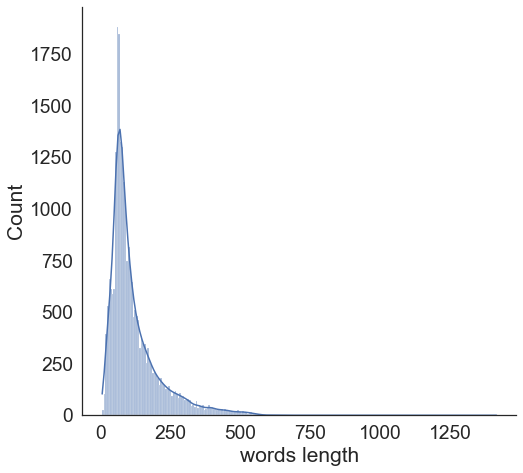

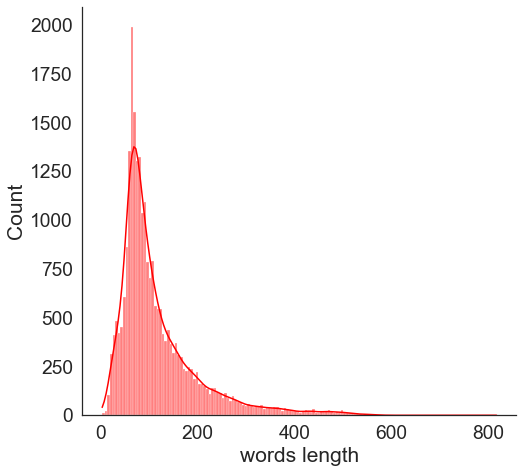

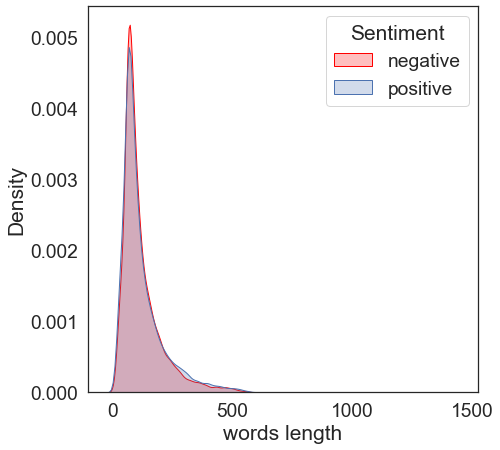

In [100]:
sns.set(font_scale = 1.75)
sns.set_style("white")

words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len


# plt.figure(figsize=(3,3))
# hist_both = sns.histplot(ax=ax, data=df_temp, x="words length", hue="sentiment", palette=[sns.color_palette()[0],'red']).set(title='Words in preprocessed-text')
# plt.show(hist_both)

hist_positive = sns.displot(data=df_temp[df_temp['sentiment'] == 'positive'], x="words length", hue="sentiment", kde=True,  height=7, aspect=1.1, legend=False)
# .set(title='Words in positive reviews')
plt.show(hist_positive)

hist_negative = sns.displot(data=df_temp[df_temp['sentiment'] == 'negative'], x="words length", hue="sentiment", kde=True,  height=7, aspect=1.1, legend=False,  palette=['red'])
# .set(title='Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize=(7,7.1))
kernel_distibution_number_words_plot  = sns.kdeplot(data=df_temp, x="words length", hue="sentiment", shade=True,  palette=[sns.color_palette()[0],'red'])
# .set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distibution_number_words_plot)

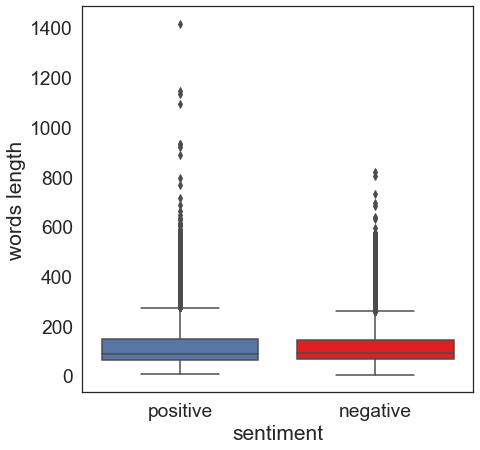

In [107]:
fig, ax = plt.subplots(figsize=(7, 7.1))
box_plot = sns.boxplot(x="sentiment", y='words length', data=df_temp, palette=[sns.color_palette()[0],'red'])
# .set(title='Words in preprocessed-text')
plt.show(box_plot)

Perform a t-test for the words length 


In [109]:
# Perform a t-test for the words length 

x_pos = df_temp[df_temp['sentiment'] == 'positive']['words length']
x_neg = df_temp[df_temp['sentiment'] == 'negative']['words length']

from scipy import stats

# two-side t-test with sample with identical means
stats.ttest_ind(x_pos, x_neg,equal_var=False)
# reject null hyp

Ttest_indResult(statistic=3.6015637907844797, pvalue=0.00031661972992647335)

N-gram Analysis

In [164]:
from sklearn.feature_extraction.text import CountVectorizer

# Returns the k most frequent n-grams from the given corpus
def get_top_k_ngrams(corpus, k, n):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)

    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 

    words_freq = sorted([(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()], key = lambda x: x[1], reverse=True)

    return words_freq[:k]


import plotly.express as px
import plotly.graph_objects as go


# Returns a barchart figure with the representation of the k most frequent n-grams
def get_barchart_for_top_k_ngrams(df, k=10, n=1, sentiment=None, x_axis_text="ngram"):

  if sentiment == "":
    # Selecting all sentiments
    most_common_grams = get_top_k_ngrams(corpus=df.review,k=k,n=n)
  elif sentiment not in ["positive", "negative"]:
    # Confirm that the user will give an accurate value for the sentiment
    raise ValueError("Sentiment must be a string that is either positive or negative") 
  else:
    most_common_grams = get_top_k_ngrams(corpus=df[df['sentiment'] == sentiment].review,k=k,n=n)

  most_common_grams = dict(most_common_grams)
  ngrams = list(most_common_grams.keys())
  frequencies = list(most_common_grams.values())

#   colors = [
#     '#1f77b4',  # muted blue
#     '#ff7f0e',  # safety orange
#     '#2ca02c',  # cooked asparagus green
#     '#d62728',  # brick red
#     '#9467bd',  # muted purple
#     '#8c564b',  # chestnut brown
#     '#e377c2',  # raspberry yogurt pink
#     '#7f7f7f',  # middle gray
#     '#bcbd22',  # curry yellow-green
#     '#17becf'   # blue-teal
# ]

  bar_fig = go.Bar(y=frequencies, x=ngrams)
  return bar_fig

Unigram Analysis

In [174]:
from plotly.subplots import make_subplots

# Unigram Analysis
fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=("Unigrams for positive reviews", "Unigrams for negative reviews"))

for count, sentiment in enumerate(["positive", "negative"]):
  fig.add_trace(
      get_barchart_for_top_k_ngrams(sentiment=sentiment, x_axis_text="word", df=df, k=10, n=1),
      row=1, col=count+1
      )

fig.update_layout(height=600, width=800, showlegend=False, font=dict(size=18))
fig.show()
# title_text="Most common unigrams sentiment wise"

Bigram Analysis

In [175]:
# Bigram Analysis
fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=("Bigrams for positive reviews", "Bigrams for negative reviews"))

for count, sentiment in enumerate(["positive", "negative"]):
  fig.add_trace(
      get_barchart_for_top_k_ngrams(sentiment=sentiment, x_axis_text="word", df=df, k=10, n=2),
      row=1, col=count+1
      )

fig.update_layout(height=600, width=800, showlegend=False, font=dict(size=18))
fig.show()
# title_text="Most common bigrams sentiment wise"

Trigram Analysis

In [177]:
# Trigram Analysis
fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=("Trigrams for positive reviews", "Trigrams for negative reviews"))

for count, sentiment in enumerate(["positive", "negative"]):
  fig.add_trace(
      get_barchart_for_top_k_ngrams(sentiment=sentiment, x_axis_text="word", df=df, k=10, n=3),
      row=1, col=count+1
      )

fig.update_layout(height=600, width=800, showlegend=False, font=dict(size=18))
fig.show()
# title_text="Most common trigrams sentiment wise",

TF-IDF Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

N = 20

# Positive vectorizer and lowest idf terms
positive_vectorizer = TfidfVectorizer()
corpus_positive = list(df[df['sentiment'] == 'positive'].review)
_X_positive = positive_vectorizer.fit_transform(corpus_positive)
idf_positive_terms_dict = dict(zip(positive_vectorizer.get_feature_names_out(), positive_vectorizer.idf_))
# Taking only the first N terms
idf_positive_terms_dict = {item[0]: idf_positive_terms_dict[item[0]] for item
                           in sorted(idf_positive_terms_dict.items(), key=lambda item: item[1])[:N]}
print("positive idf: ")
display(idf_positive_terms_dict)

# Negative vectorizer and lowest idf terms
negative_vectorizer = TfidfVectorizer()
corpus_negative = list(df[df['sentiment'] == 'negative'].review)
_X_negative = negative_vectorizer.fit_transform(corpus_negative)
idf_negative_terms_dict = dict(zip(negative_vectorizer.get_feature_names_out(), negative_vectorizer.idf_))
idf_negative_terms_dict = {item[0]: idf_negative_terms_dict[item[0]] for item
                           in sorted(idf_negative_terms_dict.items(), key=lambda item: item[1])[:N]}
print("negative idf: ")
display(idf_negative_terms_dict)


# Intersecting the terms of the two dictionaries 
# in order to remove only words that do not give information about a specific class
idf_terms = set(idf_positive_terms_dict.keys() & idf_negative_terms_dict.keys())

# New final vectorizer for the common terms
vectorizer = TfidfVectorizer()
corpus = list(df.review)
_X = vectorizer.fit_transform(corpus)
idf_terms_dict = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
idf_terms_dict = {key:value for (key,value) in idf_terms_dict.items() if key in idf_terms}
idf_terms_dict = dict(sorted(idf_terms_dict.items(), key=lambda item: item[1]))
print("final idf: ")
display(idf_terms_dict)

positive idf: 


{'not': 1.279557640594301,
 'movie': 1.5221411617585667,
 'film': 1.529961404938308,
 'one': 1.5560357061922634,
 'like': 1.8591825503587178,
 'time': 1.9191076351452685,
 'good': 1.9956053542542331,
 'see': 2.0518621499163343,
 'story': 2.078679660012642,
 'great': 2.0856764273644366,
 'would': 2.0877015635619465,
 'character': 2.1134291737765247,
 'well': 2.1403388513187918,
 'make': 2.1625803476757244,
 'get': 2.1873018772758863,
 'also': 2.2092778565556292,
 'really': 2.262941173411124,
 'even': 2.3017641253863337,
 'much': 2.326741121098083,
 'first': 2.3565619597884275}

negative idf: 


{'not': 1.1666787258599072,
 'movie': 1.3659314446483701,
 'film': 1.5593121780111183,
 'one': 1.570136952560555,
 'like': 1.6872936628472874,
 'would': 1.8560543888086247,
 'time': 1.933297562564205,
 'even': 1.9352556195612145,
 'good': 1.9673304789956216,
 'make': 2.044129624417798,
 'get': 2.0538384385447594,
 'bad': 2.055814838653313,
 'character': 2.117494654486827,
 'could': 2.134471719333404,
 'really': 2.1433235727820685,
 'see': 2.161524536646061,
 'much': 2.2247962366883987,
 'story': 2.2832442982439867,
 'scene': 2.288517490483569,
 'thing': 2.2989996120000376}

final idf: 


{'not': 1.2217428426693566,
 'movie': 1.4412928384057075,
 'film': 1.5444886627306997,
 'one': 1.5630502735127307,
 'like': 1.7698944615945909,
 'time': 1.926181568298858,
 'would': 1.9656508101432038,
 'good': 1.9814546628268357,
 'make': 2.101864652526899,
 'even': 2.1025325943800715,
 'see': 2.1050261337593597,
 'character': 2.115493587702085,
 'get': 2.118636790807618,
 'story': 2.175403124658227,
 'really': 2.2016159042693095,
 'much': 2.2747131919592913}

Modeling:

Train-test split + Labelling


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

X = list(df['review'])

# Labeling the sentient data
y = LabelBinarizer().fit_transform(df['sentiment']).ravel()
# Notice how we used stratification over the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state, stratify=y)

## Different approaches:

0) Embeddings
i) Bag-Of-Words Models
ii) TF-IDF Models

In [56]:
# #  Embeddings approach

# from gensim.models import Word2Vec 
# from gensim.models import Phrases

# train_sentences = list()
# for line in X_train:
#     word_tokens = nltk.tokenize.word_tokenize(line)
#     train_sentences.append(word_tokens)


# # Train a bigram detector.
# bigram_transformer = Phrases(train_sentences, min_count=5)

# # Apply the trained MWE detector to a corpus, using the result to train a Word2vec model.
# model = Word2Vec(sentences=bigram_transformer[train_sentences], vector_size=100, window=6, workers=8-1, min_count=1)


# # Train a word2vec model
# # model = gensim.models.Word2Vec(sentences=X, vector_size=100, window=6, workers=8-1, min_count=1)
# # vocab size
# vocab_emb = model.wv
# print("Vocabulary size for embeddings:", len(model.wv))

Vocabulary size for embeddings: 142182


In [61]:
# for index, word in enumerate(model.wv.index_to_key):
#     print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

# print(bigram_transformer)

word #0/142182 is not
word #1/142182 is movie
word #2/142182 is film
word #3/142182 is one
word #4/142182 is like
word #5/142182 is would
word #6/142182 is good
word #7/142182 is time
word #8/142182 is character
word #9/142182 is really
word #10/142182 is get
word #11/142182 is make
word #12/142182 is story
word #13/142182 is even
word #14/142182 is see
word #15/142182 is also
word #16/142182 is scene
word #17/142182 is great
word #18/142182 is could
word #19/142182 is people
word #20/142182 is way
word #21/142182 is show
word #22/142182 is well
word #23/142182 is much
word #24/142182 is bad
word #25/142182 is think
word #26/142182 is thing
word #27/142182 is first
word #28/142182 is made
word #29/142182 is know
word #30/142182 is life
word #31/142182 is watch
word #32/142182 is go
word #33/142182 is many
word #34/142182 is actor
word #35/142182 is love
word #36/142182 is two
word #37/142182 is say
word #38/142182 is best
word #39/142182 is end
word #40/142182 is never
word #41/142182 

word #2709/142182 is farm
word #2710/142182 is persona
word #2711/142182 is infamous
word #2712/142182 is atrocious
word #2713/142182 is perfection
word #2714/142182 is running_time
word #2715/142182 is seeking
word #2716/142182 is drawing
word #2717/142182 is remote
word #2718/142182 is faced
word #2719/142182 is definitely_worth
word #2720/142182 is victor
word #2721/142182 is say_least
word #2722/142182 is uninspired
word #2723/142182 is los_angeles
word #2724/142182 is ahead
word #2725/142182 is sidekick
word #2726/142182 is vacation
word #2727/142182 is lisa
word #2728/142182 is friday
word #2729/142182 is disagree
word #2730/142182 is pile
word #2731/142182 is paying
word #2732/142182 is principal
word #2733/142182 is struck
word #2734/142182 is cliche
word #2735/142182 is convince
word #2736/142182 is homosexual
word #2737/142182 is established
word #2738/142182 is tense
word #2739/142182 is stomach
word #2740/142182 is writer_director
word #2741/142182 is dan
word #2742/142182 

word #5979/142182 is vietnam_war
word #5980/142182 is substantial
word #5981/142182 is adore
word #5982/142182 is settled
word #5983/142182 is believability
word #5984/142182 is balanced
word #5985/142182 is yeah_right
word #5986/142182 is graveyard
word #5987/142182 is sanity
word #5988/142182 is participant
word #5989/142182 is straight_video
word #5990/142182 is chris_rock
word #5991/142182 is ralph
word #5992/142182 is cap
word #5993/142182 is bw
word #5994/142182 is norris
word #5995/142182 is bow
word #5996/142182 is visconti
word #5997/142182 is earl
word #5998/142182 is cameron
word #5999/142182 is divided
word #6000/142182 is aggressive
word #6001/142182 is sandra
word #6002/142182 is fluff
word #6003/142182 is herman
word #6004/142182 is locate
word #6005/142182 is explode
word #6006/142182 is cracking
word #6007/142182 is rochester
word #6008/142182 is charlotte
word #6009/142182 is pale
word #6010/142182 is teenage_girl
word #6011/142182 is eh
word #6012/142182 is ensemble_

word #9340/142182 is cough
word #9341/142182 is put_sleep
word #9342/142182 is space_ship
word #9343/142182 is snappy
word #9344/142182 is bend
word #9345/142182 is pretty_obvious
word #9346/142182 is week_ago
word #9347/142182 is coping
word #9348/142182 is tony_hawk
word #9349/142182 is back_seat
word #9350/142182 is mimic
word #9351/142182 is rotting
word #9352/142182 is hopkins
word #9353/142182 is vhs_copy
word #9354/142182 is detract
word #9355/142182 is oneill
word #9356/142182 is narcissistic
word #9357/142182 is george_lucas
word #9358/142182 is absorbed
word #9359/142182 is luminous
word #9360/142182 is ben_affleck
word #9361/142182 is runtime
word #9362/142182 is betrays
word #9363/142182 is michael_myers
word #9364/142182 is reception
word #9365/142182 is vic
word #9366/142182 is recreated
word #9367/142182 is prem
word #9368/142182 is prolific
word #9369/142182 is final_fantasy
word #9370/142182 is vanessa
word #9371/142182 is mausoleum
word #9372/142182 is confirm
word #9

word #13286/142182 is start_talking
word #13287/142182 is richard_harris
word #13288/142182 is contradict
word #13289/142182 is final_word
word #13290/142182 is emperor_new
word #13291/142182 is unbalanced
word #13292/142182 is mistaken_identity
word #13293/142182 is maggie_smith
word #13294/142182 is fraction
word #13295/142182 is drip
word #13296/142182 is get_eaten
word #13297/142182 is full_metal
word #13298/142182 is sheridan
word #13299/142182 is trying_create
word #13300/142182 is script_weak
word #13301/142182 is sit_around
word #13302/142182 is gene_hackman
word #13303/142182 is overkill
word #13304/142182 is leopold
word #13305/142182 is trench
word #13306/142182 is jenkins
word #13307/142182 is ww_ii
word #13308/142182 is mol
word #13309/142182 is avalanche
word #13310/142182 is helplessness
word #13311/142182 is severed_head
word #13312/142182 is south_american
word #13313/142182 is mary_pickford
word #13314/142182 is lesser_known
word #13315/142182 is ever_grace
word #1331

word #17171/142182 is avery
word #17172/142182 is harmon
word #17173/142182 is elisha_cook
word #17174/142182 is indulging
word #17175/142182 is respite
word #17176/142182 is recorder
word #17177/142182 is polarisdib
word #17178/142182 is story_unfold
word #17179/142182 is morality_tale
word #17180/142182 is proprietor
word #17181/142182 is howell
word #17182/142182 is ammo
word #17183/142182 is ramón
word #17184/142182 is archival_footage
word #17185/142182 is hurst
word #17186/142182 is rodriguez
word #17187/142182 is acrobatics
word #17188/142182 is controller
word #17189/142182 is mental_patient
word #17190/142182 is moreso
word #17191/142182 is penetrating
word #17192/142182 is lawless
word #17193/142182 is college_campus
word #17194/142182 is goblin
word #17195/142182 is two_dimensional
word #17196/142182 is yearns
word #17197/142182 is fullest
word #17198/142182 is painstakingly
word #17199/142182 is kirsten_dunst
word #17200/142182 is swear_word
word #17201/142182 is proposed
w

word #20738/142182 is final_reel
word #20739/142182 is secret_revealed
word #20740/142182 is comprehension
word #20741/142182 is jung
word #20742/142182 is piss
word #20743/142182 is undone
word #20744/142182 is kangaroo
word #20745/142182 is mainstream_hollywood
word #20746/142182 is butch_cassidy
word #20747/142182 is soggy
word #20748/142182 is displaced
word #20749/142182 is red_button
word #20750/142182 is decade_earlier
word #20751/142182 is managed_capture
word #20752/142182 is sat_whole
word #20753/142182 is dining
word #20754/142182 is puking
word #20755/142182 is shah_rukh
word #20756/142182 is swindle
word #20757/142182 is poor_lighting
word #20758/142182 is outstanding_job
word #20759/142182 is parttime
word #20760/142182 is washington_dc
word #20761/142182 is erroll
word #20762/142182 is kelsey_grammar
word #20763/142182 is staggeringly
word #20764/142182 is melrose_place
word #20765/142182 is faultless
word #20766/142182 is six_degree
word #20767/142182 is dashed
word #20

word #23337/142182 is gay_male
word #23338/142182 is play_guitar
word #23339/142182 is prolife
word #23340/142182 is terrifyingly
word #23341/142182 is jumping_around
word #23342/142182 is phantom_lady
word #23343/142182 is animal_cruelty
word #23344/142182 is interacts
word #23345/142182 is poignantly
word #23346/142182 is theme_tune
word #23347/142182 is jeon
word #23348/142182 is crowes
word #23349/142182 is briefcase
word #23350/142182 is acknowledgement
word #23351/142182 is superb_direction
word #23352/142182 is piece_rubbish
word #23353/142182 is vittorio
word #23354/142182 is boss_daughter
word #23355/142182 is scummy
word #23356/142182 is crucifixion
word #23357/142182 is stunted
word #23358/142182 is gorgeous_cinematography
word #23359/142182 is lilith
word #23360/142182 is wonderfully_acted
word #23361/142182 is hitler_rise
word #23362/142182 is inspired_true
word #23363/142182 is inaudible
word #23364/142182 is rukhs
word #23365/142182 is errand
word #23366/142182 is blond_

word #26837/142182 is bordello
word #26838/142182 is inanimate_object
word #26839/142182 is leach
word #26840/142182 is resolutely
word #26841/142182 is tired_seeing
word #26842/142182 is mack_sennett
word #26843/142182 is amalgam
word #26844/142182 is zed
word #26845/142182 is peckinpahs
word #26846/142182 is british_soldier
word #26847/142182 is episode_columbo
word #26848/142182 is date_doctor
word #26849/142182 is evening_entertainment
word #26850/142182 is able_convey
word #26851/142182 is basic_concept
word #26852/142182 is listed_credit
word #26853/142182 is scout_taylorcompton
word #26854/142182 is australian_tv
word #26855/142182 is bg
word #26856/142182 is impossible_care
word #26857/142182 is cuthbert
word #26858/142182 is mcmahon
word #26859/142182 is shahrukh
word #26860/142182 is henry_thomas
word #26861/142182 is saura
word #26862/142182 is ph
word #26863/142182 is zeffirellis
word #26864/142182 is price_admission
word #26865/142182 is moriarity
word #26866/142182 is lul

word #29969/142182 is flocked
word #29970/142182 is sense_honor
word #29971/142182 is curiously_enough
word #29972/142182 is ire
word #29973/142182 is fiveyear
word #29974/142182 is twosome
word #29975/142182 is raveenas
word #29976/142182 is fire_extinguisher
word #29977/142182 is sunny_day
word #29978/142182 is liar_liar
word #29979/142182 is syllable
word #29980/142182 is cheesy_scifi
word #29981/142182 is freighter
word #29982/142182 is goto
word #29983/142182 is mysterythriller
word #29984/142182 is smoldering
word #29985/142182 is celina
word #29986/142182 is inspection
word #29987/142182 is teller
word #29988/142182 is mccrae
word #29989/142182 is deadly_dull
word #29990/142182 is funeral_parlor
word #29991/142182 is doggedly
word #29992/142182 is amble
word #29993/142182 is laugh_hysterically
word #29994/142182 is dabney_coleman
word #29995/142182 is lingering_shot
word #29996/142182 is spectre
word #29997/142182 is module
word #29998/142182 is stranded_space
word #29999/142182

word #32632/142182 is giorgio
word #32633/142182 is ren_stimpy
word #32634/142182 is lightbulb
word #32635/142182 is eureka
word #32636/142182 is overthrown
word #32637/142182 is basketball_team
word #32638/142182 is leprosy
word #32639/142182 is many_splendored
word #32640/142182 is translated_english
word #32641/142182 is apex
word #32642/142182 is inferred
word #32643/142182 is shorthand
word #32644/142182 is george_carlin
word #32645/142182 is foreseeable
word #32646/142182 is serena
word #32647/142182 is materializes
word #32648/142182 is deliberately_paced
word #32649/142182 is direct_sequel
word #32650/142182 is inheriting
word #32651/142182 is pothead
word #32652/142182 is lassick
word #32653/142182 is diffident
word #32654/142182 is realworld
word #32655/142182 is rough_tumble
word #32656/142182 is doctor_nurse
word #32657/142182 is outlawed
word #32658/142182 is valentina
word #32659/142182 is completely_uninteresting
word #32660/142182 is stung
word #32661/142182 is digestib

word #35061/142182 is curing
word #35062/142182 is deterred
word #35063/142182 is bichir
word #35064/142182 is captain_wentworth
word #35065/142182 is rebel_alliance
word #35066/142182 is burakov
word #35067/142182 is aneta_corsaut
word #35068/142182 is clinker
word #35069/142182 is cuss
word #35070/142182 is engulfs
word #35071/142182 is miss_miller
word #35072/142182 is logging
word #35073/142182 is catch_breath
word #35074/142182 is juda_priest
word #35075/142182 is barbie_doll
word #35076/142182 is antenna
word #35077/142182 is ruin_reputation
word #35078/142182 is sliding_door
word #35079/142182 is fastway
word #35080/142182 is rewatchable
word #35081/142182 is openair
word #35082/142182 is radio_announcer
word #35083/142182 is hair_color
word #35084/142182 is kiss_kiss
word #35085/142182 is server
word #35086/142182 is dialogue_atrocious
word #35087/142182 is sable
word #35088/142182 is overactive
word #35089/142182 is pet_dog
word #35090/142182 is build_slowly
word #35091/142182

word #37379/142182 is wiseman
word #37380/142182 is machiavellian
word #37381/142182 is total_absence
word #37382/142182 is teeny_bopper
word #37383/142182 is manifesto
word #37384/142182 is adapt_novel
word #37385/142182 is exchange_dialogue
word #37386/142182 is paroled
word #37387/142182 is pair_scissors
word #37388/142182 is alien_express
word #37389/142182 is bullet_fired
word #37390/142182 is clownish
word #37391/142182 is password
word #37392/142182 is proliferation
word #37393/142182 is east_european
word #37394/142182 is sadly_overlooked
word #37395/142182 is storytelling_technique
word #37396/142182 is conquered_world
word #37397/142182 is brie_larson
word #37398/142182 is mainland_china
word #37399/142182 is topic_discussion
word #37400/142182 is reputedly
word #37401/142182 is chongs
word #37402/142182 is rumoured
word #37403/142182 is pussycat
word #37404/142182 is kamal_hassan
word #37405/142182 is biased_towards
word #37406/142182 is elizabeth_perkins
word #37407/142182 

word #40950/142182 is globally
word #40951/142182 is spousal
word #40952/142182 is eminently_watchable
word #40953/142182 is price_paid
word #40954/142182 is abigail_mitchell
word #40955/142182 is mud_sand
word #40956/142182 is higuchi
word #40957/142182 is safe_cracker
word #40958/142182 is doling
word #40959/142182 is desert_sand
word #40960/142182 is tutelage
word #40961/142182 is r_violence
word #40962/142182 is perry_croft
word #40963/142182 is biological_mother
word #40964/142182 is peta
word #40965/142182 is phyllida
word #40966/142182 is halfcaste
word #40967/142182 is childhood_trauma
word #40968/142182 is chriss
word #40969/142182 is elem
word #40970/142182 is instantly_fell
word #40971/142182 is embellish
word #40972/142182 is david_warbeck
word #40973/142182 is joanne_whalley
word #40974/142182 is john_knowles
word #40975/142182 is facially
word #40976/142182 is leave_breathless
word #40977/142182 is steadfastly
word #40978/142182 is pintsized
word #40979/142182 is assante


word #43883/142182 is whats
word #43884/142182 is mark_wahlbergs
word #43885/142182 is denounce
word #43886/142182 is brooks
word #43887/142182 is get_sidetracked
word #43888/142182 is hey_hey
word #43889/142182 is scolding
word #43890/142182 is doctor_companion
word #43891/142182 is carefully_chosen
word #43892/142182 is agreeably
word #43893/142182 is relocate
word #43894/142182 is everybody_el
word #43895/142182 is horizontal
word #43896/142182 is rekindling
word #43897/142182 is religious_propaganda
word #43898/142182 is bedelia
word #43899/142182 is julia_ross
word #43900/142182 is partly_due
word #43901/142182 is embezzlement
word #43902/142182 is op
word #43903/142182 is toshi
word #43904/142182 is urkel
word #43905/142182 is caroll
word #43906/142182 is timepasser
word #43907/142182 is theorizing
word #43908/142182 is effete
word #43909/142182 is princess_aura
word #43910/142182 is avenged
word #43911/142182 is ramos
word #43912/142182 is motorcycle_gang
word #43913/142182 is t

word #46837/142182 is zooey
word #46838/142182 is pyromaniac
word #46839/142182 is educates
word #46840/142182 is endearment
word #46841/142182 is radus
word #46842/142182 is giacomo
word #46843/142182 is blakely
word #46844/142182 is secombe
word #46845/142182 is pathology
word #46846/142182 is backbiting
word #46847/142182 is santoshi
word #46848/142182 is canoeing
word #46849/142182 is sermonizing
word #46850/142182 is mistreat
word #46851/142182 is adlibs
word #46852/142182 is fruitcake
word #46853/142182 is ferdin
word #46854/142182 is poncelet
word #46855/142182 is heathcliff
word #46856/142182 is slingshot
word #46857/142182 is slammer
word #46858/142182 is calmer
word #46859/142182 is monogamy
word #46860/142182 is dreya
word #46861/142182 is postsoviet
word #46862/142182 is gouald
word #46863/142182 is dantoni
word #46864/142182 is cob
word #46865/142182 is ensnare
word #46866/142182 is favs
word #46867/142182 is fullness
word #46868/142182 is humbled
word #46869/142182 is bey

word #50289/142182 is widened
word #50290/142182 is franke
word #50291/142182 is arnoul
word #50292/142182 is kellogg
word #50293/142182 is willian
word #50294/142182 is hausers
word #50295/142182 is timetravelling
word #50296/142182 is halliburton
word #50297/142182 is squeaking
word #50298/142182 is ukulele
word #50299/142182 is lobe
word #50300/142182 is geometry
word #50301/142182 is lindseys
word #50302/142182 is compost
word #50303/142182 is pavel
word #50304/142182 is curlyhaired
word #50305/142182 is shakalaka
word #50306/142182 is ivanov
word #50307/142182 is alger
word #50308/142182 is blackstone
word #50309/142182 is lucs
word #50310/142182 is junge
word #50311/142182 is cristal
word #50312/142182 is gorski
word #50313/142182 is clamp
word #50314/142182 is serie
word #50315/142182 is pru
word #50316/142182 is bumptious
word #50317/142182 is consented
word #50318/142182 is lowliest
word #50319/142182 is wasco
word #50320/142182 is throb
word #50321/142182 is hao
word #50322/1

word #53386/142182 is rewatchability
word #53387/142182 is hadhave
word #53388/142182 is prig
word #53389/142182 is boysgirls
word #53390/142182 is deafmute
word #53391/142182 is relevancy
word #53392/142182 is rajnikant
word #53393/142182 is belphegor
word #53394/142182 is hearth
word #53395/142182 is dosbox
word #53396/142182 is perfunctorily
word #53397/142182 is pinkettsmith
word #53398/142182 is superbowl
word #53399/142182 is otherness
word #53400/142182 is gohan
word #53401/142182 is oneact
word #53402/142182 is castrato
word #53403/142182 is toland
word #53404/142182 is curved
word #53405/142182 is incautos
word #53406/142182 is defected
word #53407/142182 is giva
word #53408/142182 is greenhorn
word #53409/142182 is highenergy
word #53410/142182 is vapor
word #53411/142182 is eragon
word #53412/142182 is olen_ray
word #53413/142182 is nastasya
word #53414/142182 is roping
word #53415/142182 is fearmongering
word #53416/142182 is innameonly
word #53417/142182 is reaping
word #5

word #56072/142182 is lockdown
word #56073/142182 is middlebrow
word #56074/142182 is noi
word #56075/142182 is mooching
word #56076/142182 is sapna
word #56077/142182 is purpose_whatsoever
word #56078/142182 is kickoff
word #56079/142182 is bantam
word #56080/142182 is haydens
word #56081/142182 is raquin
word #56082/142182 is parapsychology
word #56083/142182 is lostintranslation
word #56084/142182 is ulmanns
word #56085/142182 is rerunning
word #56086/142182 is tricheurs
word #56087/142182 is spiraled
word #56088/142182 is brumes
word #56089/142182 is terzieff
word #56090/142182 is godi
word #56091/142182 is jerkoff
word #56092/142182 is parisy
word #56093/142182 is leander
word #56094/142182 is warand
word #56095/142182 is hayman
word #56096/142182 is warrington
word #56097/142182 is reni
word #56098/142182 is clamoring
word #56099/142182 is santoni
word #56100/142182 is outof
word #56101/142182 is eurowestern
word #56102/142182 is cockle
word #56103/142182 is fartsy
word #56104/14

word #59158/142182 is hilariousthe
word #59159/142182 is gman
word #59160/142182 is subliminally
word #59161/142182 is holdout
word #59162/142182 is mea
word #59163/142182 is bilals
word #59164/142182 is jessalyn
word #59165/142182 is dunaways
word #59166/142182 is ilse
word #59167/142182 is estevão
word #59168/142182 is hedwig
word #59169/142182 is ladylike
word #59170/142182 is marginalizes
word #59171/142182 is dody
word #59172/142182 is glyn
word #59173/142182 is singleplayer
word #59174/142182 is toughtalking
word #59175/142182 is dicey
word #59176/142182 is radley
word #59177/142182 is masumura
word #59178/142182 is cyclist
word #59179/142182 is synapsis
word #59180/142182 is eccelson
word #59181/142182 is blackened
word #59182/142182 is fitter
word #59183/142182 is mcghee
word #59184/142182 is pepoire
word #59185/142182 is lillys
word #59186/142182 is surreality
word #59187/142182 is superspy
word #59188/142182 is anisio
word #59189/142182 is bauble
word #59190/142182 is rending

word #62755/142182 is perfectand
word #62756/142182 is vegies
word #62757/142182 is bulletfire
word #62758/142182 is pestcontrol
word #62759/142182 is ordained
word #62760/142182 is deaden
word #62761/142182 is filmwhile
word #62762/142182 is codename
word #62763/142182 is loudhailer
word #62764/142182 is empathizes
word #62765/142182 is cic
word #62766/142182 is chainofevents
word #62767/142182 is nonindian
word #62768/142182 is rantzen
word #62769/142182 is barymore
word #62770/142182 is rober
word #62771/142182 is sullavan
word #62772/142182 is chassis
word #62773/142182 is monthy
word #62774/142182 is shes
word #62775/142182 is lundigan
word #62776/142182 is zd
word #62777/142182 is enabler
word #62778/142182 is orfèvres
word #62779/142182 is creditability
word #62780/142182 is carders
word #62781/142182 is eberle
word #62782/142182 is americian
word #62783/142182 is accommodated
word #62784/142182 is hulkster
word #62785/142182 is peary
word #62786/142182 is hyperstylized
word #62

word #66674/142182 is está
word #66675/142182 is tisk
word #66676/142182 is acceptably
word #66677/142182 is warbeck
word #66678/142182 is potentes
word #66679/142182 is lowrated
word #66680/142182 is nivola
word #66681/142182 is trappist
word #66682/142182 is showbusiness
word #66683/142182 is gillmore
word #66684/142182 is reallythis
word #66685/142182 is draco
word #66686/142182 is hayloft
word #66687/142182 is krishna_acharya
word #66688/142182 is waring
word #66689/142182 is audaciously
word #66690/142182 is stordahl
word #66691/142182 is migrate
word #66692/142182 is undignified
word #66693/142182 is marcuse
word #66694/142182 is zuger
word #66695/142182 is ela
word #66696/142182 is apophis
word #66697/142182 is butted
word #66698/142182 is chilton
word #66699/142182 is unspools
word #66700/142182 is klimovs
word #66701/142182 is tukels
word #66702/142182 is detergent
word #66703/142182 is servais
word #66704/142182 is nourish
word #66705/142182 is linebyline
word #66706/142182 i

word #70335/142182 is onagainoffagain
word #70336/142182 is k_e
word #70337/142182 is trivialize
word #70338/142182 is harnessed
word #70339/142182 is sacking
word #70340/142182 is postop
word #70341/142182 is tonari
word #70342/142182 is nainital
word #70343/142182 is tokenistic
word #70344/142182 is walburn
word #70345/142182 is cinemademerde
word #70346/142182 is gratified
word #70347/142182 is orkly
word #70348/142182 is shortchanges
word #70349/142182 is pascual
word #70350/142182 is excludes
word #70351/142182 is alexandr
word #70352/142182 is supplydemand
word #70353/142182 is silvios
word #70354/142182 is bowdlerised
word #70355/142182 is depsite
word #70356/142182 is primadonna
word #70357/142182 is mospeada
word #70358/142182 is reedy
word #70359/142182 is underfed
word #70360/142182 is awayto
word #70361/142182 is dunked
word #70362/142182 is afterparty
word #70363/142182 is tezuka
word #70364/142182 is osamu
word #70365/142182 is watchover
word #70366/142182 is oncegreat
wo

word #74737/142182 is minicontest
word #74738/142182 is twoforyou
word #74739/142182 is twoforme
word #74740/142182 is idiocythis
word #74741/142182 is shakedown
word #74742/142182 is zivunited
word #74743/142182 is megamall
word #74744/142182 is kardos
word #74745/142182 is school_college
word #74746/142182 is mercurochrome
word #74747/142182 is uncomprehended
word #74748/142182 is tellin
word #74749/142182 is pastelcoloured
word #74750/142182 is lookslikeasuspens
word #74751/142182 is foottappin
word #74752/142182 is gulagher
word #74753/142182 is lobotimized
word #74754/142182 is bochcos
word #74755/142182 is levinsonlink
word #74756/142182 is sputtosi
word #74757/142182 is productionssea
word #74758/142182 is helpingout
word #74759/142182 is bilks
word #74760/142182 is indianise
word #74761/142182 is themselfs
word #74762/142182 is pseudoscientist
word #74763/142182 is credibilityyou
word #74764/142182 is pontificator
word #74765/142182 is wallraff
word #74766/142182 is darstardy
w

word #78579/142182 is spielbergit
word #78580/142182 is geare
word #78581/142182 is wouah
word #78582/142182 is planetoid
word #78583/142182 is illsupplied
word #78584/142182 is rangersstyle
word #78585/142182 is iwai
word #78586/142182 is repulsastyle
word #78587/142182 is tunneler
word #78588/142182 is paycheques
word #78589/142182 is handheldhomedigitalcamera
word #78590/142182 is seamlessness
word #78591/142182 is twojim
word #78592/142182 is abbyss
word #78593/142182 is kwiknez
word #78594/142182 is spurted
word #78595/142182 is phycho
word #78596/142182 is savio
word #78597/142182 is asianstyle
word #78598/142182 is conceitedly
word #78599/142182 is expence
word #78600/142182 is dogdays
word #78601/142182 is outwhile
word #78602/142182 is muchstudied
word #78603/142182 is wayoverthetop
word #78604/142182 is skeltonpowelllahrobrien
word #78605/142182 is nocternal
word #78606/142182 is erogenous
word #78607/142182 is diferent
word #78608/142182 is superstructure
word #78609/142182 

word #81472/142182 is apartmentrehearsal
word #81473/142182 is twoheaded
word #81474/142182 is coinheads
word #81475/142182 is dayi
word #81476/142182 is threesuns
word #81477/142182 is daym
word #81478/142182 is lemps
word #81479/142182 is oneprobably
word #81480/142182 is messa
word #81481/142182 is timpani
word #81482/142182 is insipidness
word #81483/142182 is comedysomething
word #81484/142182 is indestructibility
word #81485/142182 is dockthen
word #81486/142182 is finlaysonin
word #81487/142182 is pathossomething
word #81488/142182 is roachproduced
word #81489/142182 is thoughall
word #81490/142182 is grandiloquence
word #81491/142182 is graphicsor
word #81492/142182 is expunker
word #81493/142182 is tenseless
word #81494/142182 is nonhammy
word #81495/142182 is corpsei
word #81496/142182 is rhee
word #81497/142182 is slained
word #81498/142182 is tautlywritten
word #81499/142182 is jesús
word #81500/142182 is cellfbi
word #81501/142182 is dinofan
word #81502/142182 is girlscw
w

word #84526/142182 is hauntingsalienswhatever
word #84527/142182 is splurging
word #84528/142182 is smoulder
word #84529/142182 is crazystupid
word #84530/142182 is carreo
word #84531/142182 is lobisomen
word #84532/142182 is diskants
word #84533/142182 is morgannas
word #84534/142182 is pornlike
word #84535/142182 is welltended
word #84536/142182 is genoms
word #84537/142182 is interferring
word #84538/142182 is sire
word #84539/142182 is plaçage
word #84540/142182 is mantony
word #84541/142182 is asagiri
word #84542/142182 is yamazaki
word #84543/142182 is spinoffprequel
word #84544/142182 is prisswantsrevengeforaminorcharacter
word #84545/142182 is boomerwell
word #84546/142182 is justicerevenge
word #84547/142182 is ditziness
word #84548/142182 is fancypants
word #84549/142182 is outprofessionaled
word #84550/142182 is farenheight
word #84551/142182 is lecouvreur
word #84552/142182 is stormer
word #84553/142182 is sinn
word #84554/142182 is fein
word #84555/142182 is bloodlinestarr

word #87269/142182 is drawbackthere
word #87270/142182 is courseakshay
word #87271/142182 is hotbeautiful
word #87272/142182 is hoursderived
word #87273/142182 is bitbybit
word #87274/142182 is exussr
word #87275/142182 is recomendation
word #87276/142182 is cyhper
word #87277/142182 is billsi
word #87278/142182 is aliensiii
word #87279/142182 is againalmost
word #87280/142182 is cartoonquality
word #87281/142182 is tazmanian
word #87282/142182 is candi
word #87283/142182 is youthgonewild
word #87284/142182 is ultrapersonal
word #87285/142182 is orgyladen
word #87286/142182 is affectingly
word #87287/142182 is harltey
word #87288/142182 is clusterf
word #87289/142182 is titlecards
word #87290/142182 is overplease
word #87291/142182 is itmick
word #87292/142182 is leasing
word #87293/142182 is journalistloveinterest
word #87294/142182 is madethey
word #87295/142182 is outrageousfunny
word #87296/142182 is laughwatch
word #87297/142182 is moviesthen
word #87298/142182 is horriblecatwoman

word #91295/142182 is gaionsbourgs
word #91296/142182 is lovelook
word #91297/142182 is thenpresent
word #91298/142182 is desperateafter
word #91299/142182 is exagerating
word #91300/142182 is opinionthe
word #91301/142182 is rudewhat
word #91302/142182 is fnwjr
word #91303/142182 is moviehe
word #91304/142182 is agoa
word #91305/142182 is horribler
word #91306/142182 is followgene
word #91307/142182 is unfrench
word #91308/142182 is bootadmittedly
word #91309/142182 is disentangling
word #91310/142182 is comedicrelief
word #91311/142182 is aaip
word #91312/142182 is startall
word #91313/142182 is programsaccessoriesaccessabiltynarratorhaving
word #91314/142182 is concisest
word #91315/142182 is polygamous
word #91316/142182 is bulling
word #91317/142182 is suspectentertaint
word #91318/142182 is congratulatoins
word #91319/142182 is sevenfoot
word #91320/142182 is witchiepoo
word #91321/142182 is nosediving
word #91322/142182 is easterneuropean
word #91323/142182 is placei
word #91324

word #95471/142182 is thomashowever
word #95472/142182 is morcombe
word #95473/142182 is directordirectless
word #95474/142182 is chestpuffing
word #95475/142182 is semperes
word #95476/142182 is morcillos
word #95477/142182 is víctor
word #95478/142182 is poetryinspiring
word #95479/142182 is hootens
word #95480/142182 is damir
word #95481/142182 is farnsworthwho
word #95482/142182 is transferral
word #95483/142182 is genuiss
word #95484/142182 is donetsk
word #95485/142182 is cliftonkristen
word #95486/142182 is boyand
word #95487/142182 is rebyata
word #95488/142182 is afhanskii
word #95489/142182 is unholliwood
word #95490/142182 is axton
word #95491/142182 is terrorismcounterterrorism
word #95492/142182 is pokemonhaters
word #95493/142182 is fienneswillem
word #95494/142182 is manralph
word #95495/142182 is nursejuliette
word #95496/142182 is binochehis
word #95497/142182 is bortz
word #95498/142182 is toproped
word #95499/142182 is legdragging
word #95500/142182 is thingsbut
word

word #100157/142182 is leelees
word #100158/142182 is theothers
word #100159/142182 is rtexas
word #100160/142182 is moonfleet
word #100161/142182 is actionif
word #100162/142182 is candlelightdo
word #100163/142182 is christmasbut
word #100164/142182 is uglyuncanonicalidioticand
word #100165/142182 is samvise
word #100166/142182 is batb
word #100167/142182 is upbecause
word #100168/142182 is overbearingponderous
word #100169/142182 is fifis
word #100170/142182 is classica
word #100171/142182 is loveart
word #100172/142182 is spoiles
word #100173/142182 is unasco
word #100174/142182 is cancun
word #100175/142182 is ropsenlski
word #100176/142182 is rosnelski
word #100177/142182 is bluefor
word #100178/142182 is marthapauls
word #100179/142182 is pbar
word #100180/142182 is rivault
word #100181/142182 is bicyclist
word #100182/142182 is writerif
word #100183/142182 is stuporous
word #100184/142182 is lesperance
word #100185/142182 is tréjan
word #100186/142182 is mathurin
word #100187/1

word #104429/142182 is ondřejs
word #104430/142182 is grillo
word #104431/142182 is plotstrand
word #104432/142182 is sabadell
word #104433/142182 is buides
word #104434/142182 is mxyzptlk
word #104435/142182 is puppetshow
word #104436/142182 is chungthis
word #104437/142182 is mok
word #104438/142182 is spearended
word #104439/142182 is bladewielding
word #104440/142182 is optimizing
word #104441/142182 is speelman
word #104442/142182 is deloiselle
word #104443/142182 is saythis
word #104444/142182 is piscipo
word #104445/142182 is wayoverreached
word #104446/142182 is husbandpromoter
word #104447/142182 is hunkotarzan
word #104448/142182 is onesidecharacters
word #104449/142182 is aliendwarfhybrid
word #104450/142182 is vampgirl
word #104451/142182 is pottymouth
word #104452/142182 is frogalien
word #104453/142182 is maincharactersmuppets
word #104454/142182 is maincharacter
word #104455/142182 is fantasyelements
word #104456/142182 is dejavus
word #104457/142182 is ohyeah
word #1044

word #108175/142182 is believeron
word #108176/142182 is tremblayjulian
word #108177/142182 is ladyslow
word #108178/142182 is helllastly
word #108179/142182 is explicating
word #108180/142182 is bleb
word #108181/142182 is bandy
word #108182/142182 is wowwwwww
word #108183/142182 is hadddd
word #108184/142182 is maaaybbbeee
word #108185/142182 is thescreamonline
word #108186/142182 is lifedestroying
word #108187/142182 is tamped
word #108188/142182 is closeset
word #108189/142182 is zelahs
word #108190/142182 is observantly
word #108191/142182 is religioussexual
word #108192/142182 is crazylong
word #108193/142182 is fantasynightmares
word #108194/142182 is spiderwoman
word #108195/142182 is madelene
word #108196/142182 is butterscotch
word #108197/142182 is succeeed
word #108198/142182 is comesup
word #108199/142182 is mithimithali
word #108200/142182 is azmiis
word #108201/142182 is gettingfor
word #108202/142182 is sanjiv
word #108203/142182 is kanwaljit
word #108204/142182 is deci

word #111193/142182 is alhawsani
word #111194/142182 is rja
word #111195/142182 is alriyadh
word #111196/142182 is lowshallow
word #111197/142182 is dawood
word #111198/142182 is renumber
word #111199/142182 is keif
word #111200/142182 is alhal
word #111201/142182 is artsps
word #111202/142182 is almohaisen
word #111203/142182 is fantasysword
word #111204/142182 is frazettaesquire
word #111205/142182 is failedespecially
word #111206/142182 is bikie
word #111207/142182 is newsreporting
word #111208/142182 is nowsit
word #111209/142182 is messylooking
word #111210/142182 is ostentation
word #111211/142182 is wamsi
word #111212/142182 is shakeyourhead
word #111213/142182 is sanjays
word #111214/142182 is parentally
word #111215/142182 is underwearsoiling
word #111216/142182 is lacerated
word #111217/142182 is walteryes
word #111218/142182 is twentythird
word #111219/142182 is massy
word #111220/142182 is abishai
word #111221/142182 is michol
word #111222/142182 is wonderhow
word #111223/1

word #113388/142182 is castcraig
word #113389/142182 is unecessary
word #113390/142182 is traumatisingly
word #113391/142182 is filmmakersactors
word #113392/142182 is spendy
word #113393/142182 is peavey
word #113394/142182 is midlong
word #113395/142182 is spink
word #113396/142182 is doohans
word #113397/142182 is robustly
word #113398/142182 is friesian
word #113399/142182 is gelding
word #113400/142182 is ishaak
word #113401/142182 is firstfavorite
word #113402/142182 is whorde
word #113403/142182 is cept
word #113404/142182 is nonsanta
word #113405/142182 is apeshyt
word #113406/142182 is occultistsyep
word #113407/142182 is backhence
word #113408/142182 is aboundsnot
word #113409/142182 is strano
word #113410/142182 is florian
word #113411/142182 is vizio
word #113412/142182 is signora
word #113413/142182 is nonargento
word #113414/142182 is buonotype
word #113415/142182 is totters
word #113416/142182 is lá
word #113417/142182 is boxinglovecrime
word #113418/142182 is strykers
w

word #117192/142182 is firmware
word #117193/142182 is zzzzzzzz
word #117194/142182 is facedness
word #117195/142182 is replanted
word #117196/142182 is immigrantsparticularly
word #117197/142182 is gregori
word #117198/142182 is aquaintance
word #117199/142182 is hilariousreminded
word #117200/142182 is cheekthus
word #117201/142182 is ericka
word #117202/142182 is braincandy
word #117203/142182 is readyrating
word #117204/142182 is weightlosing
word #117205/142182 is pilloried
word #117206/142182 is ausiness
word #117207/142182 is epyon
word #117208/142182 is belowcabin
word #117209/142182 is stupidityi
word #117210/142182 is durag
word #117211/142182 is ohtsji
word #117212/142182 is mullerstahl
word #117213/142182 is dizzys
word #117214/142182 is notalwaysrewarding
word #117215/142182 is shrinkage
word #117216/142182 is chinesejapanese
word #117217/142182 is schappert
word #117218/142182 is taayla
word #117219/142182 is markell
word #117220/142182 is chojnacki
word #117221/142182 is

word #120939/142182 is nowadaysepic
word #120940/142182 is lambsbest
word #120941/142182 is russomercedes
word #120942/142182 is japaneseness
word #120943/142182 is acceptence
word #120944/142182 is relevent
word #120945/142182 is missunderstand
word #120946/142182 is themsleves
word #120947/142182 is signifier
word #120948/142182 is lovelust
word #120949/142182 is franzthe
word #120950/142182 is overweening
word #120951/142182 is abovepar
word #120952/142182 is pyroclastic
word #120953/142182 is mudstreaks
word #120954/142182 is kusanagis
word #120955/142182 is russodean
word #120956/142182 is bugbear
word #120957/142182 is madorishe
word #120958/142182 is spoilersalison
word #120959/142182 is sentinela
word #120960/142182 is malditos
word #120961/142182 is damnedobs
word #120962/142182 is zang
word #120963/142182 is downeymatthew
word #120964/142182 is modineis
word #120965/142182 is marcomichelle
word #120966/142182 is marcoalec
word #120967/142182 is worstfilmyou
word #120968/14218

word #124693/142182 is bunkerfox
word #124694/142182 is demornay
word #124695/142182 is mornays
word #124696/142182 is sciorrra
word #124697/142182 is drescher
word #124698/142182 is everstolid
word #124699/142182 is oscarbaiting
word #124700/142182 is mostlylooked
word #124701/142182 is badwhat
word #124702/142182 is smarttech
word #124703/142182 is guins
word #124704/142182 is lathe
word #124705/142182 is molassesthick
word #124706/142182 is quebecoise
word #124707/142182 is tourtiere
word #124708/142182 is toujours
word #124709/142182 is coeurs
word #124710/142182 is welltuned
word #124711/142182 is obrother
word #124712/142182 is burrough
word #124713/142182 is bipartisan
word #124714/142182 is jiwoons
word #124715/142182 is magnifiscent
word #124716/142182 is reliefsrubbish
word #124717/142182 is caning
word #124718/142182 is babysmall
word #124719/142182 is winched
word #124720/142182 is griffits
word #124721/142182 is favoritetime
word #124722/142182 is phh
word #124723/142182 i

word #126854/142182 is rayvyn
word #126855/142182 is throwspaghettiatthewall
word #126856/142182 is lcdr
word #126857/142182 is viceadmiral
word #126858/142182 is mayport
word #126859/142182 is metarzanyoujane
word #126860/142182 is malayan
word #126861/142182 is winterbottoms
word #126862/142182 is filmfareother
word #126863/142182 is khakkee
word #126864/142182 is tosstogether
word #126865/142182 is altrock
word #126866/142182 is vacantly
word #126867/142182 is grandiloquent
word #126868/142182 is starrings
word #126869/142182 is lifelovers
word #126870/142182 is prostrated
word #126871/142182 is inconstant
word #126872/142182 is chaimsaw
word #126873/142182 is loust
word #126874/142182 is stroytelling
word #126875/142182 is comicmanga
word #126876/142182 is inu
word #126877/142182 is yasha
word #126878/142182 is dreamtas
word #126879/142182 is soundsabout
word #126880/142182 is tendo
word #126881/142182 is dojo
word #126882/142182 is socialistic
word #126883/142182 is ritchiestyle
w

word #129799/142182 is guestwho
word #129800/142182 is noncommunicative
word #129801/142182 is roomie
word #129802/142182 is caughtup
word #129803/142182 is laughterthe
word #129804/142182 is castmerrill
word #129805/142182 is menaceyou
word #129806/142182 is brandare
word #129807/142182 is boringharrison
word #129808/142182 is maywether
word #129809/142182 is onepaced
word #129810/142182 is depravation
word #129811/142182 is vigran
word #129812/142182 is performancein
word #129813/142182 is alsoduring
word #129814/142182 is mcphillips
word #129815/142182 is shrieked
word #129816/142182 is discoy
word #129817/142182 is princesstobe
word #129818/142182 is mclaghlan
word #129819/142182 is alper
word #129820/142182 is artjust
word #129821/142182 is studentshard
word #129822/142182 is spririt
word #129823/142182 is notalented
word #129824/142182 is mountaintown
word #129825/142182 is pseudomadmen
word #129826/142182 is lucios
word #129827/142182 is shocksequences
word #129828/142182 is sho

word #133481/142182 is bernieeric
word #133482/142182 is dareis
word #133483/142182 is throatyuk
word #133484/142182 is confusingor
word #133485/142182 is mccormickanne
word #133486/142182 is cardwhich
word #133487/142182 is charliethanks
word #133488/142182 is crites
word #133489/142182 is naturerepresentation
word #133490/142182 is bita
word #133491/142182 is myselfyou
word #133492/142182 is interrest
word #133493/142182 is rogoz
word #133494/142182 is goodlamarr
word #133495/142182 is oneso
word #133496/142182 is aroundbut
word #133497/142182 is strangeand
word #133498/142182 is pseudooriginal
word #133499/142182 is kaddiddlehopper
word #133500/142182 is whomeverhe
word #133501/142182 is wellso
word #133502/142182 is roundtrip
word #133503/142182 is sakeslow
word #133504/142182 is sulia
word #133505/142182 is hugebreasted
word #133506/142182 is shiranui
word #133507/142182 is psychosupporting
word #133508/142182 is dolas
word #133509/142182 is bignames
word #133510/142182 is critial

word #137127/142182 is chicklis
word #137128/142182 is directoron
word #137129/142182 is morenot
word #137130/142182 is continuate
word #137131/142182 is weightloss
word #137132/142182 is puffpieces
word #137133/142182 is entertainmentless
word #137134/142182 is studioera
word #137135/142182 is studiorecorded
word #137136/142182 is maudie
word #137137/142182 is mangiamatti
word #137138/142182 is oboler
word #137139/142182 is hemmingwaylike
word #137140/142182 is directorsproducersand
word #137141/142182 is telkovsky
word #137142/142182 is apartmentthemed
word #137143/142182 is cooleverything
word #137144/142182 is iy
word #137145/142182 is hhehesee
word #137146/142182 is geners
word #137147/142182 is hkfilm
word #137148/142182 is seeitman
word #137149/142182 is wolfgiamatti
word #137150/142182 is blackend
word #137151/142182 is aback
word #137152/142182 is sixteenthcentury
word #137153/142182 is azar
word #137154/142182 is daughtersdominique
word #137155/142182 is gorethe
word #137156/

word #139674/142182 is nonaffair
word #139675/142182 is barnesgoes
word #139676/142182 is burnius
word #139677/142182 is roadibus
word #139678/142182 is goldbergstyle
word #139679/142182 is santayana
word #139680/142182 is redoubling
word #139681/142182 is psychosadistic
word #139682/142182 is setdesigner
word #139683/142182 is fecking
word #139684/142182 is weeble
word #139685/142182 is draughty
word #139686/142182 is earthquack
word #139687/142182 is blackhalf
word #139688/142182 is distributive
word #139689/142182 is matsushimameiko
word #139690/142182 is grønne
word #139691/142182 is slagtere
word #139692/142182 is waddled
word #139693/142182 is pruner
word #139694/142182 is overthere
word #139695/142182 is cuse
word #139696/142182 is olddes
word #139697/142182 is whileas
word #139698/142182 is lieber
word #139699/142182 is manyounger
word #139700/142182 is youhailing
word #139701/142182 is eightpage
word #139702/142182 is adultsonly
word #139703/142182 is witchmaker
word #139704/1

/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


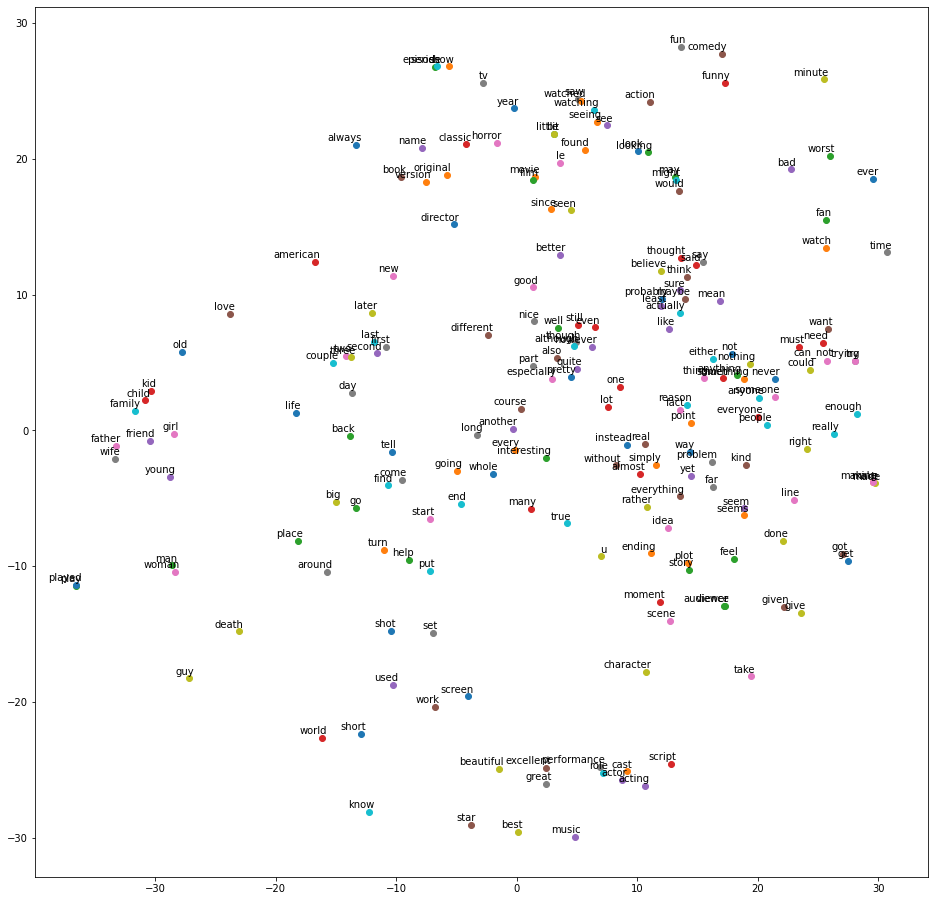

In [69]:
# from sklearn.manifold import TSNE

# def tsne_plot(model, points_to_plot=None):
#     "Creates and TSNE model and plots it"
#     labels = []
#     tokens = []

#     for word in model.wv.index_to_key:
#         tokens.append(model.wv[word])
#         labels.append(word)
    
#     tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=random_state)
#     new_values = tsne_model.fit_transform(tokens)

#     x = []
#     y = []
#     for value in new_values:
#         x.append(value[0])
#         y.append(value[1])
    
#     if points_to_plot == None:
#         points_to_plot = len(x)
        
#     plt.figure(figsize=(16, 16)) 
#     for i in range(points_to_plot):
#         plt.scatter(x[i],y[i])
#         plt.annotate(labels[i],
#                      xy=(x[i], y[i]),
#                      xytext=(5, 2),
#                      textcoords='offset points',
#                      ha='right',
#                      va='bottom')
#     plt.show()
    
# tsne_plot(model,200)

In [89]:
# def mean_document_vector(model, doc):
#     """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
#     doc = [word for word in doc if word in model.wv.index_to_key]
#     return np.mean(model.wv[doc], axis=0)


# X_train_av_word_vec = []
# for i, doc in enumerate(X_train):
#     X_train_av_word_vec.append(mean_document_vector(model, doc))
#     print(i)
        
#       # do somthing with the vector ${vec}
# # X_train_av_word_vec = list(map(document_vector, X_train))
# # X_test_av_word_vec = list(map(document_vector, X_test))

# # from sklearn.linear_model import LogisticRegression
# # from sklearn.metrics import accuracy_score
# # # Training the model
# # lr_1 = LogisticRegression(penalty='l2', max_iter=500, random_state=random_state)
# # # Fitting the model for av_word_vec
# # lr_av_word_vec = lr_1.fit(X_train_av_word_vec, y_train)
# # # Predicting the test data for av_word_vec
# # lr_av_word_vec_predict = lr_1.predict(X_test_av_word_vec)
# # # Accuracy score for bag of word
# # lr_av_word_vec_score = accuracy_score(y_test,lr_av_word_vec_predict)
# # print("lr_av_word_vec_score :", lr_av_word_vec_score)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


KeyboardInterrupt: 

In [123]:
import gensim

model = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=2, window=5, workers=8-1, epochs=30)

# Create the tagged document needed for Doc2Vec
def create_tagged_document(list_of_list_of_words, tokens_only=False):
    for i, list_of_words in enumerate(list_of_list_of_words):
        tokens = gensim.utils.simple_preprocess(list_of_words)
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])
        
train_data = list(create_tagged_document(X_train))
test_data = list(create_tagged_document(X_test, tokens_only=True))

print(train_data[0:2])

print("Building vocabulary")
# Build the Volabulary
model.build_vocab(train_data)

# Train the Doc2Vec model
print("Training doc2vec model")
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs)

[TaggedDocument(words=['logic', 'go', 'straight', 'train', 'window', 'british', 'horror', 'film', 'set', 'london', 'underground', 'starring', 'usually', 'reliable', 'franka', 'potente', 'run', 'lola', 'run', 'franka', 'play', 'kate', 'businesswoman', 'way', 'office', 'party', 'meet', 'friend', 'fall', 'asleep', 'underground', 'station', 'wake', 'find', 'locked', 'find', 'chased', 'someone', 'something', 'killer', 'intention', 'plot', 'hole', 'unbelievability', 'rife', 'moment', 'actually', 'jumpy', 'scary', 'plenty', 'plain', 'dull', 'unpleasant', 'film', 'stay', 'locked', 'underground', 'forever', 'favour', 'plus', 'point', 'inclusion', 'cast', 'popular', 'veteran', 'actor', 'ken', 'campbell', 'done', 'better', 'even', 'including', 'erasmus', 'microman'], tags=[0]), TaggedDocument(words=['almost', 'tedious', 'watch', 'read', 'evening', 'gorgeously', 'produced', 'failure', 'meryl', 'streep', 'walk', 'quietly', 'show', 'cast', 'member', 'act', 'kind', 'stuff', 'vanessa', 'redgrave', 'sh

In [126]:
def get_doc2vec_vectors(model, tagged_docs):
    regressors = []
    for doc_id in range(len(tagged_docs)):
        inferred_vector = model.infer_vector(tagged_docs[doc_id])
        regressors.append(inferred_vector)
    return regressors   

X_train_doc2vec = get_doc2vec_vectors(model, [words for (words, tags) in train_data])
X_test_doc2vec = get_doc2vec_vectors(model, test_data)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Training the model
lr_1 = LogisticRegression(penalty='l2', max_iter=500, random_state=random_state)
# Fitting the model for doc2vec
lr_doc2vec = lr_1.fit(X_train_doc2vec, y_train)
# Predicting the test data for doc2vec
lr_doc2vec_predict = lr_1.predict(X_test_doc2vec)
# Accuracy score for bag of word
lr_doc2vec_score = accuracy_score(y_test,lr_doc2vec_predict)
print("lr_doc2vec_score :", lr_doc2vec_score)

lr_doc2vec_score : 0.860945850559645


Using N-gram of range 2, since the aren't many specific occurances of n-grams among the review-documents (show that they follow a uniform-like distribution)

The BOW models It is used to convert text documents to numerical vectors or bag of words.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
# Bags of words 
# It is used to convert text documents to numerical vectors or bag of words.
# Count vectorizer for bag of words (Notice: that we are saving one-grams, bi-grams and tri-grams as tokens)
cv = CountVectorizer(ngram_range=(1,2))
# Transformed train reviews
X_train_bow = cv.fit_transform(X_train)
# Transformed test reviews
X_test_bow = cv.transform(X_test)

print('X_train_bow:', X_train_bow.shape)
print('X_test_bow:', X_test_bow.shape)

from sklearn.feature_extraction.text import TfidfVectorizer
# Tf-idf
tfidf_vect = TfidfVectorizer(ngram_range=(1,2)) #tfidfVectorizer
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)
print('X_train_tfidf:', X_train_tfidf.shape)
print('X_test_tfidf:', X_test_tfidf.shape)

X_train_bow: (39665, 125985)
X_test_bow: (9917, 125985)
X_train_tfidf: (39665, 2558536)
X_test_tfidf: (9917, 2558536)


In [27]:
for c in cv.get_feature_names_out():
    print(c)

aaron
abandon
abandoned
abbott
abbott costello
abc
abducted
ability
able
able find
able get
able make
able see
able watch
ably
aboard
abomination
abortion
abound
abraham
abroad
abrupt
abruptly
absence
absent
absolute
absolute worst
absolutely
absolutely awful
absolutely brilliant
absolutely hilarious
absolutely horrible
absolutely love
absolutely loved
absolutely not
absolutely nothing
absolutely sense
absolutely terrible
absorbed
absorbing
abstract
absurd
absurdity
abundance
abuse
abused
abusive
abysmal
abyss
academic
academy
academy award
accent
accent not
accept
acceptable
acceptance
accepted
accepting
accepts
access
accessible
accident
accidental
accidentally
acclaim
acclaimed
accompanied
accompanies
accompany
accompanying
accomplice
accomplish
accomplished
accomplishment
according
account
accuracy
accurate
accurately
accusation
accused
accustomed
ace
achieve
achieved
achievement
achieves
achieving
acid
acknowledge
acknowledged
acquaintance
acquire
acquired
across
across screen
act

censorship
cent
center
center around
centered
centered around
central
central character
centre
century
cerebral
ceremony
certain
certain scene
certainly
certainly not
certainly one
certainly would
cg
cgi
chain
chained
chainsaw
chainsaw massacre
chair
chalk
challenge
challenged
challenging
chamber
champion
championship
chan
chance
chance see
chance watch
chaney
change
change life
change mind
changed
changing
channel
chaos
chaotic
chaplin
chapter
character
character acting
character actor
character actually
character also
character always
character appear
character bad
character believable
character cannot
character character
character come
character completely
character could
character design
character development
character especially
character even
character ever
character film
character first
character get
character go
character good
character great
character interesting
character introduced
character involved
character life
character likable
character like
character little
character 

cracker
cracking
craft
crafted
craig
crane
crap
crap like
crap movie
crap not
crappy
crappy movie
crash
crashed
crashing
crass
craven
craving
crawford
crawl
craze
crazed
crazy
cream
create
created
creates
creating
creation
creative
creativity
creator
creature
creature feature
credibility
credible
credit
credit not
credit roll
credit rolled
credited
creek
creep
creepiness
creepy
crew
crew member
cried
crime
crime drama
crime film
crime scene
criminal
cringe
cringed
cringing
crippled
crisis
crisp
criterion
critic
critical
critically
criticism
criticize
criticized
criticizing
critique
critter
crocodile
cronenberg
crook
crooked
crop
crosby
cross
crossed
crossing
crow
crowd
crowded
crown
crucial
crude
cruel
cruelty
cruise
crummy
crush
crushed
cry
crypt
crystal
cuba
cuban
cube
cue
culminating
culprit
cult
cult classic
cult following
cult movie
cultural
culture
cunning
cup
cup tea
cure
cured
curiosity
curious
curiously
curly
current
currently
curry
curse
cursed
cursing
curtain
curtis
curve
cu

faye
fbi
fbi agent
fear
feared
feast
feat
feather
feature
feature film
feature length
featured
featuring
fed
federal
feeble
feed
feeding
feel
feel bad
feel character
feel film
feel good
feel like
feel movie
feel much
feel need
feel not
feel real
feel sorry
feel way
feelgood
feeling
feeling film
feeling like
feeling not
feisty
felix
fell
fell asleep
fell love
fellini
fellow
felt
felt like
felt sorry
female
female character
female lead
female nudity
feminine
feminist
femme
femme fatale
fence
fernando
fest
festival
fetched
fetish
fever
fewer
fi
fiancé
fiancée
fiasco
fiction
fiction film
fictional
fictitious
field
fiend
fiennes
fierce
fiery
fifteen
fifteen minute
fifteen year
fifth
fifty
fight
fight club
fight scene
fight sequence
fighter
fighting
fighting scene
figure
figured
file
fill
filled
filler
filling
film
film absolutely
film acting
film action
film actor
film actually
film adaptation
film almost
film along
film already
film also
film although
film always
film amazing
film another


keep getting
keep going
keep guessing
keep interest
keep interested
keep mind
keep movie
keep thing
keep viewer
keep watching
keeper
keeping
keira
keith
kelly
ken
kennedy
kenneth
kenneth branagh
kent
kentucky
kept
kept thinking
kept waiting
kept watching
kermit
kevin
kevin kline
kevin spacey
key
keyboard
khan
kick
kicked
kicking
kid
kid could
kid film
kid get
kid movie
kid not
kid show
kid would
kiddie
kidding
kiddy
kidman
kidnap
kidnapped
kidnapping
kidnaps
kill
kill not
kill one
kill people
killed
killed not
killed one
killer
killer not
killing
killing people
killing spree
kilmer
kim
kind
kind film
kind like
kind movie
kind people
kind thing
kind way
kindly
kindness
king
king kong
kingdom
kingsley
kinky
kinnear
kinski
kirk
kiss
kissing
kitchen
kitten
kitty
klaus
kline
knack
knee
knew
knew going
knew would
knife
knight
knightley
knock
knocked
knocking
knockoff
know
know anyone
know anything
know bad
know better
know cannot
know character
know could
know end
know even
know everything
k

organized
orgy
oriental
oriented
origin
original
original film
original idea
original movie
original not
original one
original plot
original series
original star
original story
original version
originality
originally
orleans
orphan
orson
orson welles
oscar
oscar best
oscar nomination
oscar winner
oscar winning
oscar worthy
oscarwinning
ostensibly
others
others like
others not
otherwise
otherwise not
otherwise would
otoole
otto
ought
ounce
out
outbreak
outburst
outcast
outcome
outdated
outdoor
outer
outer space
outfit
outing
outlandish
outlaw
outlet
outline
outlook
output
outrageous
outrageously
outright
outset
outside
outsider
outstanding
outstanding performance
outta
outtake
overact
overacted
overacting
overacts
overall
overall film
overall good
overall movie
overall not
overbearing
overblown
overboard
overcome
overcoming
overdone
overhead
overlong
overlook
overlooked
overly
overnight
overrated
overseas
overshadowed
overt
overthetop
overtly
overtone
overuse
overused
overweight
overwhe

seldom
select
selected
selection
self
selfabsorbed
selfcentered
selfindulgent
selfish
sell
selleck
seller
selling
semblance
semi
sen
senator
send
sending
sends
senior
sens
sensation
sensational
sense
sense humor
sense humour
sense movie
sense not
sense whatsoever
sense word
senseless
sensibility
sensible
sensitive
sensitivity
sensual
sent
sentence
sentenced
sentiment
sentimental
sentimentality
separate
separated
separation
september
sequel
sequel not
sequence
sequence film
sequence not
sequence one
serf
sergeant
sergio
serial
serial killer
series
series ever
series film
series like
series movie
series not
series one
series would
serious
serious film
serious movie
serious problem
seriously
seriously not
seriousness
serum
servant
serve
served
service
serving
session
set
set costume
set design
set film
set fire
set new
set piece
seth
setpieces
setting
settle
settled
setup
seven
seven year
seventh
seventy
several
several character
several people
several scene
several time
several year
seve

time time
time travel
time trying
time two
time want
time watch
time watched
time watching
time well
time without
time would
time writing
time year
timed
timeless
timeline
timing
timothy
timothy dalton
tin
tina
tiny
tip
tire
tired
tiresome
tissue
tit
titanic
title
title brazil
title character
title film
title like
title movie
title role
title sequence
title song
titled
titular
tobe
toby
today
today film
today movie
today not
today standard
today would
todd
toe
together
together end
together film
together make
together not
together one
together well
toilet
token
tokyo
told
told not
told story
tolerable
tolerance
tolerate
toll
tom
tom cruise
tom hank
tom jerry
tom selleck
tomato
tomb
tommy
tommy lee
tomorrow
ton
tone
tone film
toned
tongue
tongue cheek
tongueincheek
toni
tonight
tony
took
took place
took time
tool
tooth
top
top film
top form
top list
top movie
top not
top notch
top secret
top ten
topic
topless
topnotch
topped
torch
torment
tormented
torn
toronto
torture
tortured
torturin

Truncated Singular Value Decomposition (SVD) VISUALIZATION

Cannot use PCA, due to the nature of the PCA, even if the input is an sparse matrix, the output is not. 

/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



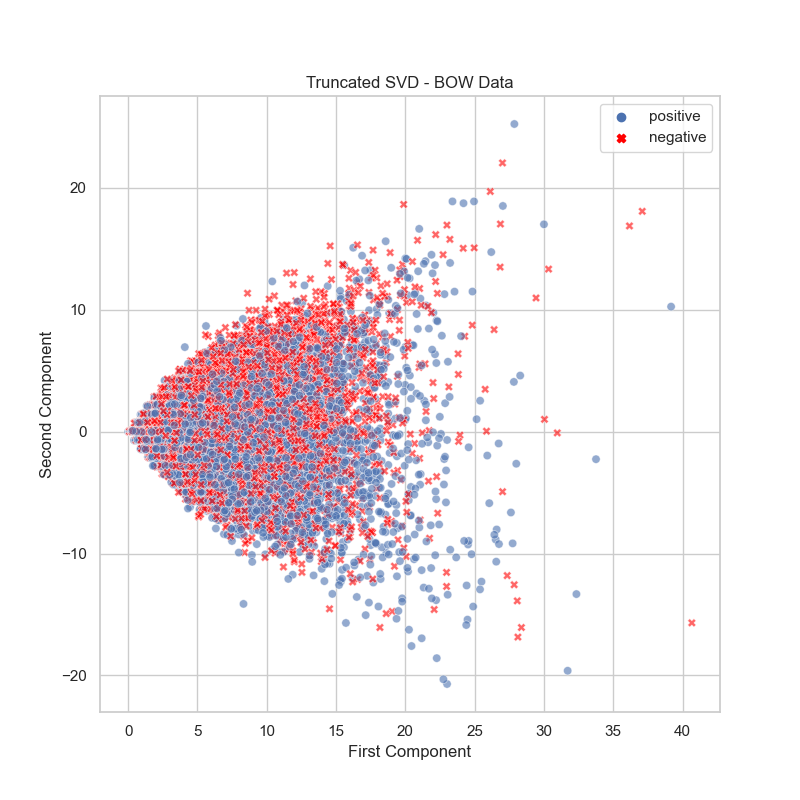

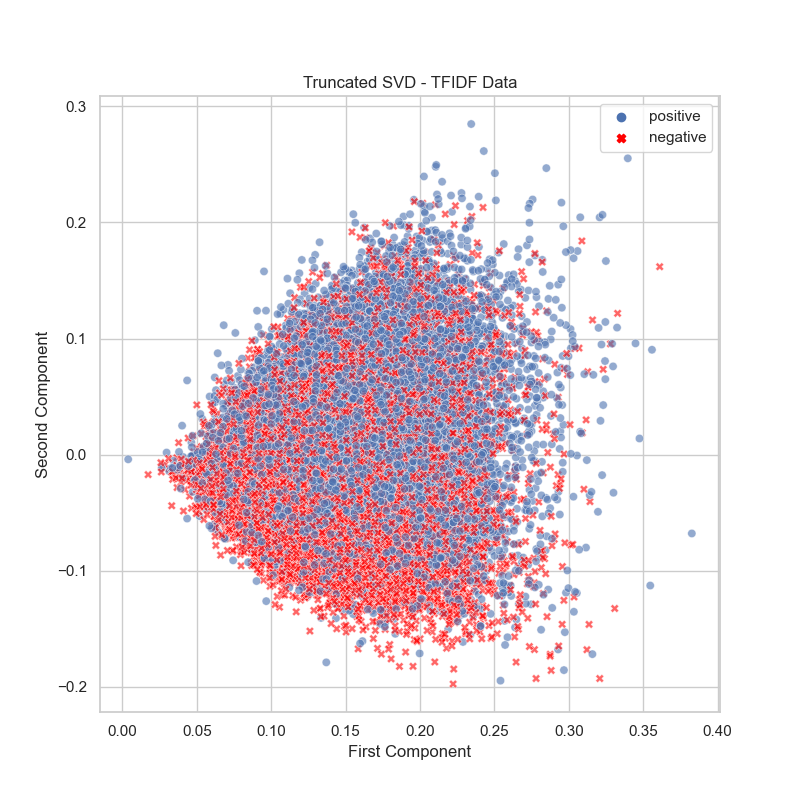

In [36]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

def apply_TruncatedSVD(X, n_components=2, random_state=random_state, title=""):
    tsvd = TruncatedSVD(n_components=2, random_state=random_state)
    tsvd.fit(X) 
    X_tsvd = tsvd.transform(X) 

    # Create a new dataframe with the new components
    # Creates pandas DataFrame.
    df_tsvd = pd.DataFrame(data={'First Component':X_tsvd[:,0],
                                 'Second Component':X_tsvd[:,1]})
    df_tsvd['sentiment'] = pd.Series(y_train, dtype="string")
    df_tsvd.loc[df_tsvd['sentiment'] == "0", 'sentiment'] = 'positive'
    df_tsvd.loc[df_tsvd['sentiment'] == "1", 'sentiment'] = 'negative'

    sns.set_style("whitegrid")

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    ax.set_xlabel("First Component")
    ax.set_ylabel("Second Component")

    sns.scatterplot(data=df_tsvd, x='First Component', y='Second Component', hue="sentiment", 
                    style="sentiment", alpha=0.6, palette=[sns.color_palette()[0],'red']).set(title=title)

    ax.legend()

apply_TruncatedSVD(X_train_bow, n_components=2, random_state=random_state, title='Truncated SVD - BOW Data')
apply_TruncatedSVD(X_train_tfidf, n_components=2, random_state=random_state, title='Truncated SVD - TFIDF Data')

# Plot the data in an interactive plot
# import plotly.express as px
# fig = px.scatter_3d(df_tsvd, x='First Component', y='Second Component', z='Third Component',
#               color='sentiment', symbol='sentiment', opacity=0.99)

# print(fig.data)
# fig.update_traces(marker=dict(size=4,line_width=0.0000001))
# fig.update_layout(height=1000, width=1000,
#                   title='Examining Population and Life Expectancy Over Time')
# fig.show()

Feature selection:

sklearn chi2 p value explained

https://www.google.com/search?q=sklearn+chi2+p+value+explained&sxsrf=AOaemvLZXqQbJO2bIsPEO0ihHKu3CYr9LQ%3A1633517434828&ei=en9dYbv_Md3TgweomZSACg&oq=sklearn+chi2+p+value+explained&gs_lcp=Cgdnd3Mtd2l6EAMYADIHCCEQChCgAToHCCMQsAMQJzoHCAAQRxCwAzoECCEQFToGCCEQChAVSgQIQRgAUJEfWJwlYPwvaAJwAngAgAGvAYgBhAaSAQMwLjaYAQCgAQHIAQnAAQE&sclient=gws-wiz

In [29]:
from sklearn.feature_selection import chi2

scores_chi2, pvalues_chi2 = chi2(X_train_bow, y_train)

In [30]:
# # Taking into consideration only the scores, of which the p-values which are lower than a thershold (e.g. 0.1)
# # choosing p-value under .01, for the results to be considered statistically significant

# threshold = 0.07
# kept_chi2 = {index: [scores_chi2[index], pvalues_chi2[index]] for index in np.argsort(scores_chi2)[::-1] if pvalues_chi2[index] < threshold}
# kept_chi2_df = pd.DataFrame.from_dict(kept_chi2, orient='index', columns=["chi2 score", "p-value"])
# # kept_chi2_df['normalized chi2 score']=(kept_chi2_df['normalized chi2 score']-kept_chi2_df['normalized chi2 score'].min())/(kept_chi2_df['normalized chi2 score'].max()-kept_chi2_df['normalized chi2 score'].min())
# display(kept_chi2_df.head())
# new_vocabulary = cv.get_feature_names_out()[kept_chi2_df.index]
# kept_chi2_df = kept_chi2_df.set_index([pd.Index(new_vocabulary)])
# display(kept_chi2_df.head())
# print("Total features kept:", len(new_vocabulary))                  
# new_vocabulary[0:30]

# subset_kept_chi2_df = kept_chi2_df[:20]
# # subset_kept_chi2_df['p-value'] = -np.log10(subset_kept_chi2_df['p-value'])

# for feature, i in zip(['chi2 score'], range(1)):a
#     sns.barplot(data=subset_kept_chi2_df.reset_index(), x=feature, y='index',  orient='h')

In [31]:
# Remaking of datasets with the selected features only

# Bags of words 
# It is used to convert text documents to numerical vectors or bag of words.
# Count vectorizer for bag of words (Notice: that we are saving one-grams and bi-grams and as tokens)
cv = CountVectorizer(min_df=0.0003, max_df = 0.85, ngram_range=(1,2))
# Transformed train reviews
X_train_bow = cv.fit_transform(X_train)
# Transformed test reviews
X_test_bow = cv.transform(X_test)
print(cv.get_feature_names_out())
print('X_train_bow:', X_train_bow.shape)
print('X_test_bow:', X_test_bow.shape)

# Tf-idf
tfidf_vect = TfidfVectorizer(min_df=0.0003, max_df = 0.85, ngram_range=(1,2)) #tfidfVectorizer
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)
print('X_train_tfidf:', X_train_tfidf.shape)
print('X_test_tfidf:', X_test_tfidf.shape)

['aa' 'aaliyah' 'aamir' ... 'zucco' 'zucker' 'zulu']
X_train_bow: (39665, 52265)
X_test_bow: (9917, 52265)
X_train_tfidf: (39665, 52265)
X_test_tfidf: (9917, 52265)


Logistic Regression TF-IDF

In [32]:
from sklearn.linear_model import LogisticRegression

# Training the model
lr_2 = LogisticRegression(penalty='l2', max_iter=500, random_state=random_state)

# Fitting the model for TF-IDFfrom sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Training the model
lr_1 = LogisticRegression(penalty='l2', max_iter=500, random_state=random_state)

# Fitting the model for Bag of words
lr_bow = lr_1.fit(X_train_bow, y_train)
# Predicting the test data for Bag of words
lr_bow_predict = lr_1.predict(X_test_bow)
# Accuracy score for bag of word
lr_bow_score = accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :", lr_bow_score)
lr_tfidf = lr_2.fit(X_train_tfidf, y_train)
# Predicting the test data for tfidf
lr_tfidf_predict = lr_2.predict(X_test_tfidf)
# Accuracy score for tfidf
lr_tfidf_score = accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :", lr_tfidf_score)

lr_bow_score : 0.8973479883029142
lr_tfidf_score : 0.9049107593022083


FOUND THAT BY JUST REMOVING domain related STOP WORDS with lowest idf (which are NON strong sentiment words) we got better performance

uni-gram:  0.8831299788242412, 0.8987597055561157
bi-gram:   0.899263890289402,  0.8917011192901079

by keeping 'not':
uni-gram: 0.8850458808107291, 0.8995664011293738
bi-gram:  0.9032973681556923,  0.8957345971563981
tri-gram: 0.9008772814359182, 0.888171826157104

removed first 3 domain + keeping not:
uni-gram: 0.8851467177573863, 0.8993647272360593
bi-gram: 0.9040032267822931,  0.8948270646364828
tri-gram: 0.9020873247958052, 0.8875668044771604

Feature importances study using coeffs of the LR

From the above I can clearly see why the use of 'not' is useful

Tried to express the above graphs with p-values but, had memory issues on the use of sparse representation of the X matrix

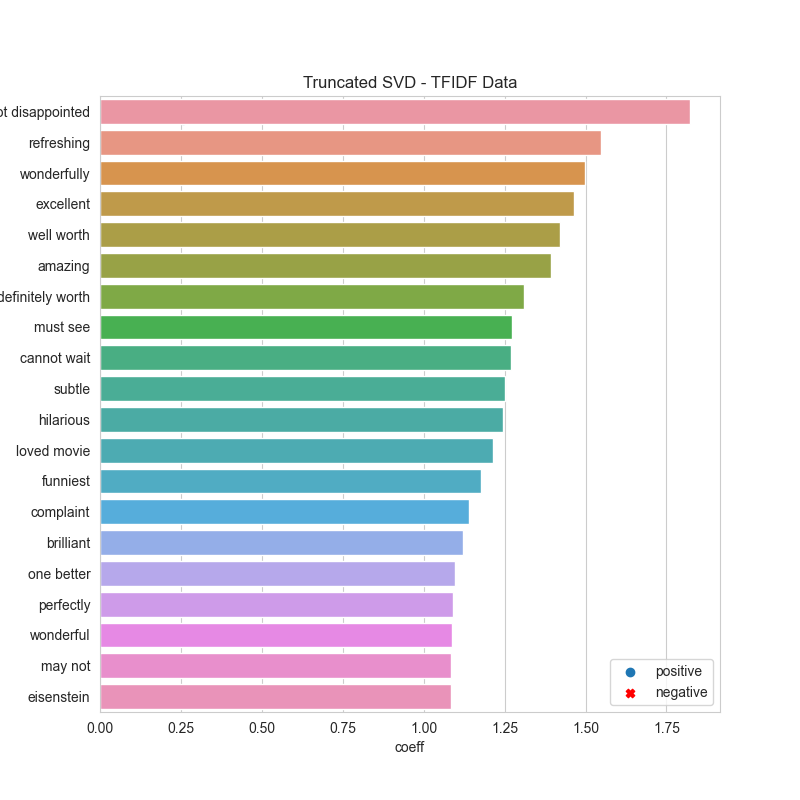

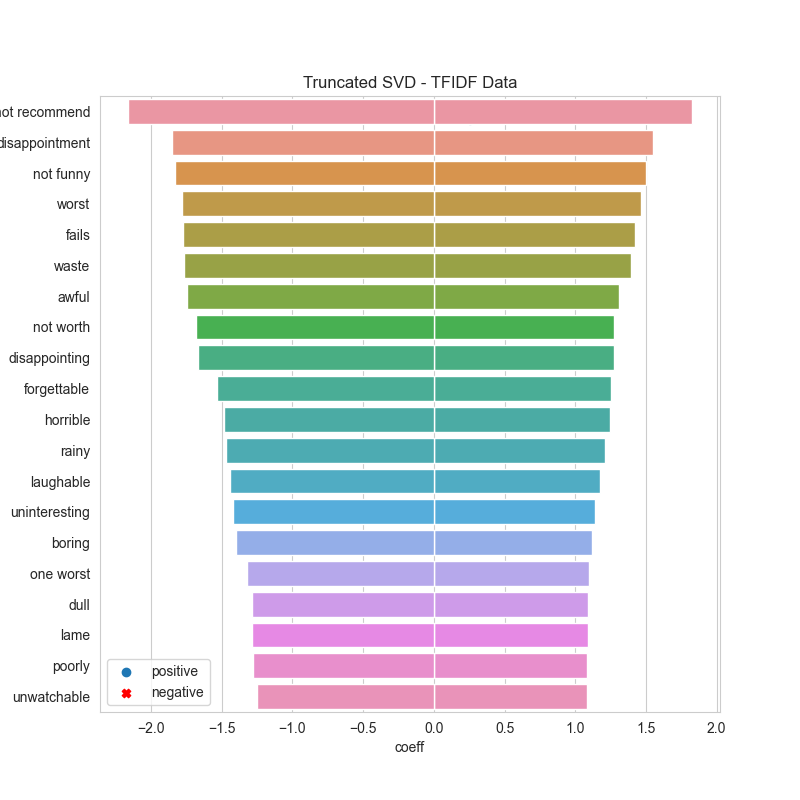

In [33]:
# The estimated coefficients will all be around 1

coeffs = lr_1.coef_[0]

top_20_coeffs_positive = np.sort(coeffs)[::-1][0:20]
top_20_coeffs_negative = np.sort(coeffs)[0:20]


# Getting the top 20 positively and top 20 negatively impact weights
top_20_positive = cv.get_feature_names_out()[np.argsort(coeffs)[::-1][0:20]]
top_20_negative = cv.get_feature_names_out()[np.argsort(coeffs)[:20]]

sns.set(rc={'figure.figsize':(11.0, 7.5)})

# summarize feature importance for positive class impact
# plot feature importance
positive_coeffs = pd.DataFrame({'features': top_20_positive, 'coeff': top_20_coeffs_positive})
ax = sns.barplot(x = 'coeff', y = 'features', 
              data = positive_coeffs)
ax.set(xlabel='coeff', ylabel='n-gram feature')
plt.show()

# summarize feature importance for negative class impact
# plot feature importance
negative_coeffs = pd.DataFrame({'features': top_20_negative, 'coeff': top_20_coeffs_negative})
ax = sns.barplot(x = 'coeff', y = 'features', 
              data = negative_coeffs)
ax.set(xlabel='coeff', ylabel='n-gram feature')
plt.show()

RandomForest Model

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Training the model
rf_1 = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=random_state, verbose=2, n_jobs=6)

# Fitting the model for Bag of words
rf_tfidf = rf_1.fit(X_train_doc2vec, y_train)
# Predicting the test data for Bag of words
rf_tfidf_predict = rf_1.predict(X_test_doc2vec)
# Accuracy score for bag of word
rf_tfidf_score = accuracy_score(y_test,rf_tfidf_predict)
print("rf_tfidf_score :", rf_tfidf_score)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


building tree 1 of 300building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300

building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300


[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    7.2s


building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77

[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   35.0s


building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300


[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:  1.2min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    0.3s


rf_tfidf_score : 0.8113340728042755


[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.7s finished


In [129]:
a = rf_1.predict(X_train_tfidf)
accuracy_score(y_train,a)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    6.4s finished


1.0

RF: 0.8617525461329031 (no parameters and overfits:1.0 train fit)
0.8160734092971664 (overfits, 99% train fit)
0.8657860239991934, 0.9498298247825538 (n_estimators=300, max_depth=40)
0.8662902087324795, 0.9427959157947813 (n_estimators=500, max_depth=35)
0.8681052737723102 0.9430732383713601 (n_estimators=600, max_depth=35)
0.8705253604920843, 0.950913903945544 (n_estimators=600, max_depth=40)